To the README: [README](./README.md)<br/>
To the previous notebook: [Credit Card ML](./credit-card-ml.ipynb)<br/>

--------------------------------------------------------------------------------

# Network Traffic: EDA

## Reading and Understanding

In [1]:
# Import base packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.style import Colors
import utils.network_traffic as util
from utils.network_traffic import Col

In [2]:
# Load data
training_data = pd.read_csv(util.File.original_training, header=None)
training_data.columns = util.Col._all_pretty[:-2]
verification_data = pd.read_csv(util.File.original_verification, header=None)
verification_data.columns = util.Col._all_pretty[:-2]

In [3]:
# First five rows
training_data.head()

,Duration (s),Protocol Type,Service,Flag,#Bytes from source to destination,#Bytes from destination to source,"Same host/ port? (0 - No, 1 - Yes)",#Wrong Fragments,#Urgent packets,#Hot indicators,...,#Connections to same host and service from destination in past 2s,% of same-host connections from destination to the same service,% of same-host connections from destination to different services,% of same-host connections from destination to the same service and port,% of same-service connections from destination to different hosts,% of same-host connections from destination with `SYN` errors,% of same-service connections from destination with `SYN` errors,% of same-host connections from destination with `REJ` errors,% of same-service connections from destination with `REJ` errors,Target type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal


In [4]:
# Info
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                                                                    Dtype  
---  ------                                                                    -----  
 0   Duration (s)                                                              int64  
 1   Protocol Type                                                             object 
 2   Service                                                                   object 
 3   Flag                                                                      object 
 4   #Bytes from source to destination                                         int64  
 5   #Bytes from destination to source                                         int64  
 6   Same host/ port? (0 - No, 1 - Yes)                                        int64  
 7   #Wrong Fragments                                                          int64  
 8   #Urgent pack

In [5]:
# Descriptive statistics
training_data.describe()

,Duration (s),#Bytes from source to destination,#Bytes from destination to source,"Same host/ port? (0 - No, 1 - Yes)",#Wrong Fragments,#Urgent packets,#Hot indicators,#Failed login attempts,"Logged in? (0 - No, 1 - Yes)",#Compromised Conditions,...,#Connections to same host from destination in past 2s,#Connections to same host and service from destination in past 2s,% of same-host connections from destination to the same service,% of same-host connections from destination to different services,% of same-host connections from destination to the same service and port,% of same-service connections from destination to different hosts,% of same-host connections from destination with `SYN` errors,% of same-service connections from destination with `SYN` errors,% of same-host connections from destination with `REJ` errors,% of same-service connections from destination with `REJ` errors
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,...,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,...,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
training_data.describe(include=['object'])

,Protocol Type,Service,Flag,Target type
count,4898431,4898431,4898431,4898431
unique,3,70,11,23
top,icmp,ecr_i,SF,smurf
freq,2833545,2811660,3744328,2807886


### Findings

In [7]:
print(f'The column "{Col.target_type}" contains {training_data[Col.target_type].nunique()} unique values in the training dataset')
print(f'and {verification_data[Col.target_type].nunique()} ones in the verification dataset.')

print(f"What's more, there are {len(set(training_data[Col.target_type].unique()).difference(verification_data[Col.target_type].unique()))} types in the training data that are not in the verification data and")
print(f"{len(set(verification_data[Col.target_type].unique()).difference(training_data[Col.target_type].unique()))} ones vice versa.")

The column "Target type" contains 23 unique values in the training dataset
and 38 ones in the verification dataset.
What's more, there are 2 types in the training data that are not in the verification data and
17 ones vice versa.


Attempting to train a model to be able to predict the target/ attack type doesn't make sense.
Instead, we will need to change the objective here.
What we are going to do is to first map the attack types onto one of the four major groups described on the source website's task description.
While not being able to identify the concrete type, the models should be able to identify the group of attack in the verification dataset.
Second, we will create another target column; a binary situation that tells whether or not an attack is happening.

To then compare training and verification datasets in one graph using `seaborn` it would be nice to have both in one combined dataframe.
But in order to retain the information from which source each record comes, we are also going to add a flag (column) for that as well - but only in this notebook.
This flag will not be present in the machine learning datasets.

In [8]:
# For the target group, we will use this mapping:
target_types = {
    'normal': 'normal',
    'neptune': 'dos',
    'satan': 'probe',
    'smurf': 'dos',
    'ipsweep': 'probe',
    'portsweep': 'probe',
    'nmap': 'probe',
    'guess_passwd': 'r2l',
    'back': 'dos',
    'mscan': 'probe',
    'warezmaster': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'apache2': 'dos',
    'processtable': 'dos',
    'saint': 'probe',
    'snmpguess': 'probe',
    'mailbomb': 'dos',
    'pod': 'dos',
    'snmpgetattack': 'dos',
    'httptunnel': 'r2l',
    'buffer_overflow': 'u2r',
    'land': 'dos',
    'multihop': 'r2l',
    'rootkit': 'u2r',
    'named': 'r2l',
    'ps': 'u2r',
    'sendmail': 'r2l',
    'imap': 'r2l',
    'xterm': 'r2l',
    'loadmodule': 'u2r',
    'ftp_write': 'r2l',
    'xlock': 'r2l',
    'phf': 'r2l',
    'perl': 'u2r',
    'xsnoop': 'r2l',
    'udpstorm': 'dos',
    'spy': 'r2l',
    'worm': 'r2l',
    'sqlattack': 'u2r',
}
def group(target): return target_types[target]
def identify(target): return target!='normal'

# Create two new columns with the classification and the attack identification information:
training_data[Col.target_classification] = training_data[Col.target_type].map(group)
training_data[Col.target_identification] = training_data[Col.target_type].map(identify)
verification_data[Col.target_classification] = verification_data[Col.target_type].map(group)
verification_data[Col.target_identification] = verification_data[Col.target_type].map(identify)

# Add the source flag to both datasets
training_data['Source'] = 'Training'
verification_data['Source'] = 'Verification'

# Combine both datasets into one
combined_data = pd.concat([training_data, verification_data], axis=0)

Keeping in mind that the training and verification datasets consist of different amounts of records, in order to compare them side-by-side it would be helpful to look at their distributions in terms of percentages with reference to their individual numbers of records.

So, in order to look at how the individual target columns are spread across both sources, lets convert the results of the basic `value_counts()` member to a floating point number indicating the respective ratios:

In [9]:
num_training_records = len(training_data)
num_verification_records = len(verification_data)

target_type_barplot_data = pd.DataFrame(combined_data.groupby(['Source']).value_counts([Col.target_type])).reset_index()
target_type_barplot_data['Relative'] = target_type_barplot_data.apply(
    lambda row: row['count']/(num_training_records if row['Source']=='Training' else num_verification_records),
    axis=1
)

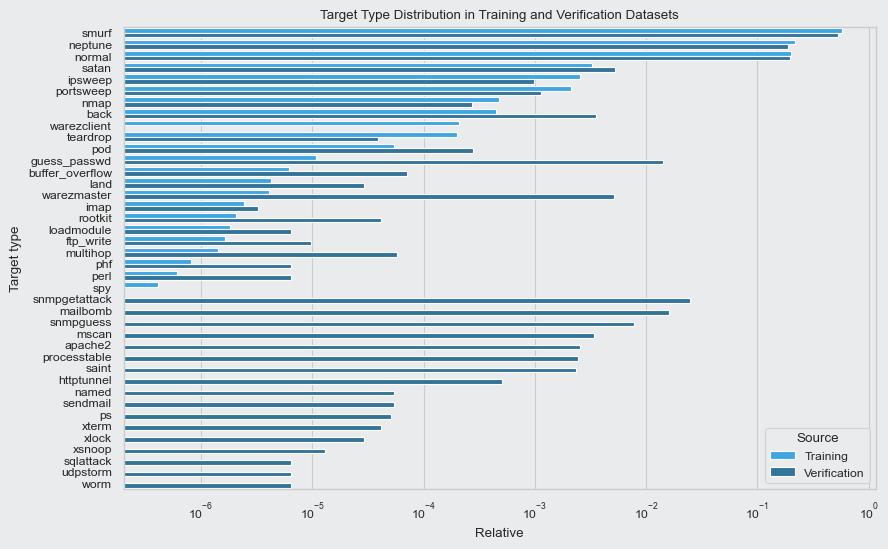

In [10]:
sns.barplot(target_type_barplot_data, x='Relative', y=Col.target_type, hue='Source', palette=Colors.blues2)
plt.title('Target Type Distribution in Training and Verification Datasets')
plt.xscale('log')
plt.show()

Note that the `Relative` axis is logarithmically scaled.
With this in mind, one can see that most of the attack types in the training dataset are represented by *less than one percent* of the records while `neptune`, `smurf` and `normal` each cover *more than ten percent each*!

Curiously, `neptune` and `smurf`, both belonging to the `dos` attack group, outnumber the `normal` cases.
So at this point already can we assume to find a lot of duplicated records for those two, as it would be characteristic for a DOS attack.
But we will come to this in a minute.

First, let's look at the distribution for the remaining two target columns: the attack identification and the target classification.

In [11]:
target_identification_barplot_data = pd.DataFrame(combined_data.groupby(['Source']).value_counts([Col.target_identification])).reset_index()
target_identification_barplot_data['Relative'] = target_identification_barplot_data.apply(
    lambda row: row['count']/(num_training_records if row['Source']=='Training' else num_verification_records),
    axis=1
)

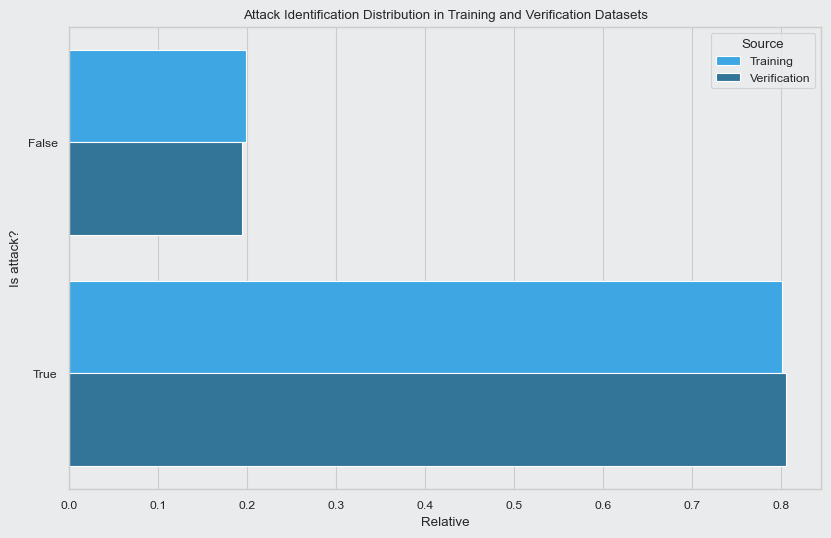

In [12]:
sns.barplot(target_identification_barplot_data, x='Relative', y=Col.target_identification, orient='h', hue='Source', palette=Colors.blues2)
plt.title('Attack Identification Distribution in Training and Verification Datasets')
plt.show()

Again, we see that the dataset apparently contains more attacks than genuine network requests.
And that could be a realistic scenario for a network under attack.
However, from looking at our previous (as well as on our next) graphic, we expect to find a lot of duplicates in our datasets, and the *real* distribution will change when removing those.

In [13]:
target_classification_barplot_data = pd.DataFrame(combined_data.groupby(['Source']).value_counts([Col.target_classification])).reset_index()
target_classification_barplot_data['Relative'] = target_classification_barplot_data.apply(
    lambda row: row['count']/(num_training_records if row['Source']=='Training' else num_verification_records),
    axis=1
)

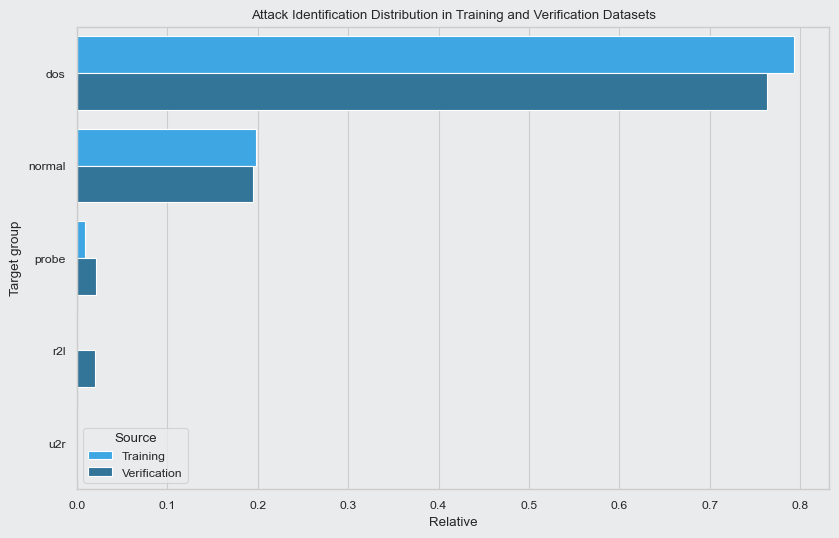

In [14]:
sns.barplot(target_classification_barplot_data, x='Relative', y=Col.target_classification, hue='Source', palette=Colors.blues2)
plt.title('Attack Identification Distribution in Training and Verification Datasets')
plt.show()

## Duplicates

In [15]:
print('-- Training Dataset --')
print(f'The original trainining dataset consists of {len(training_data)} records.')
print(f'{sum(training_data.duplicated())} of them are duplicates.')
training_data_ = training_data.drop_duplicates()
print(f'For the machine learning part, {len(training_data_)} unique records remain.')

-- Training Dataset --
The original trainining dataset consists of 4898431 records.
3823439 of them are duplicates.
For the machine learning part, 1074992 unique records remain.


In [16]:
print('-- Verification Dataset --')
print(f'The original verification dataset consists of {len(verification_data)} records.')
print(f'{sum(verification_data.duplicated())} of them are duplicates.')
verification_data_ = verification_data.drop_duplicates()
print(f'For the machine learning part, {len(verification_data_)} unique records remain.')

-- Verification Dataset --
The original verification dataset consists of 311029 records.
233738 of them are duplicates.
For the machine learning part, 77291 unique records remain.


Now, let's look at the three distributions again, but on the cleaned datasets:

In [17]:
combined_data_ = pd.concat([training_data_, verification_data_], axis=0)

In [18]:
num_training_records_ = len(training_data_)
num_verification_records_ = len(verification_data_)

target_type_barplot_data_ = pd.DataFrame(combined_data_.groupby(['Source']).value_counts([Col.target_type])).reset_index()
target_type_barplot_data_['Relative'] = target_type_barplot_data_.apply(
    lambda row: row['count']/(num_training_records_ if row['Source']=='Training' else num_verification_records_),
    axis=1
)

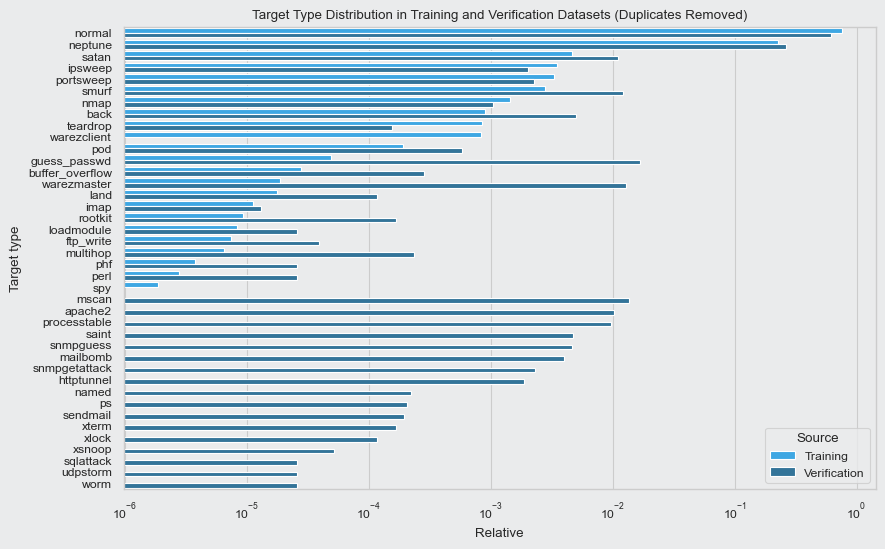

In [19]:
sns.barplot(target_type_barplot_data_, x='Relative', y=Col.target_type, hue='Source', palette=Colors.blues2)
plt.title('Target Type Distribution in Training and Verification Datasets (Duplicates Removed)')
plt.xscale('log')
plt.show()

Now the `normal` cases outnumber the others, as we would expect (or rather "hope") for network communication.
However, the `neptune` attack type proves to be very powerful in comparison with all the other attacks, essentially dominating the entire attack spectrum in both the training and verification dataset.
If left as it is, this type will prevent the models from learning the characteristics of the other types.
But we will come to this issue later.

Next, let's look at the attack identification case:

In [20]:
target_identification_barplot_data_ = pd.DataFrame(combined_data_.groupby(['Source']).value_counts([Col.target_identification])).reset_index()
target_identification_barplot_data_['Relative'] = target_identification_barplot_data_.apply(
    lambda row: row['count']/(num_training_records_ if row['Source']=='Training' else num_verification_records_),
    axis=1
)

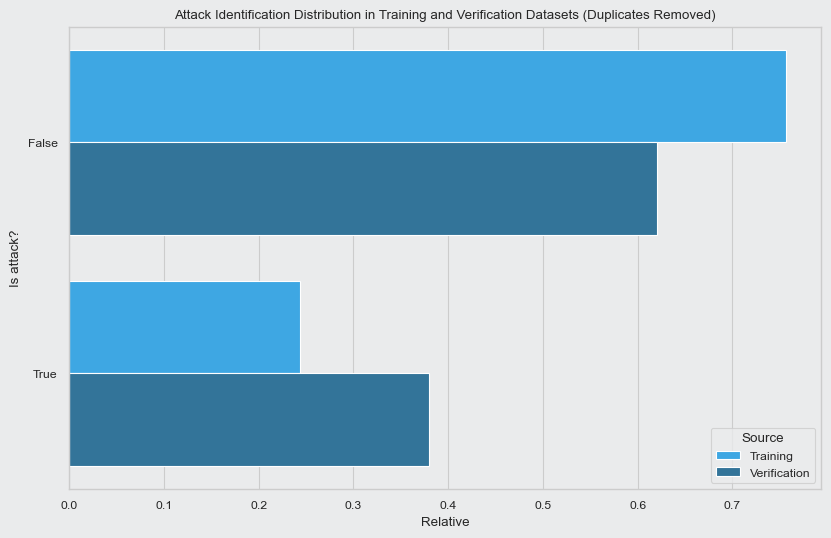

In [21]:
sns.barplot(target_identification_barplot_data_, x='Relative', y=Col.target_identification, orient='h', hue='Source', palette=Colors.blues2)
plt.title('Attack Identification Distribution in Training and Verification Datasets (Duplicates Removed)')
plt.show()

Again, this is more what we would expect to see in the context of attack identification.
Although with such a high percentage in attacks in both cases, it becomes obvious how aggressive the cybersecurity landscape around network communication truly is, given that the dataset we're analyzing has roots in the real world.

Finally, let's look into the classification data:

In [22]:
target_classification_barplot_data_ = pd.DataFrame(combined_data_.groupby(['Source']).value_counts([Col.target_classification])).reset_index()
target_classification_barplot_data_['Relative'] = target_classification_barplot_data_.apply(
    lambda row: row['count']/(num_training_records_ if row['Source']=='Training' else num_verification_records_),
    axis=1
)

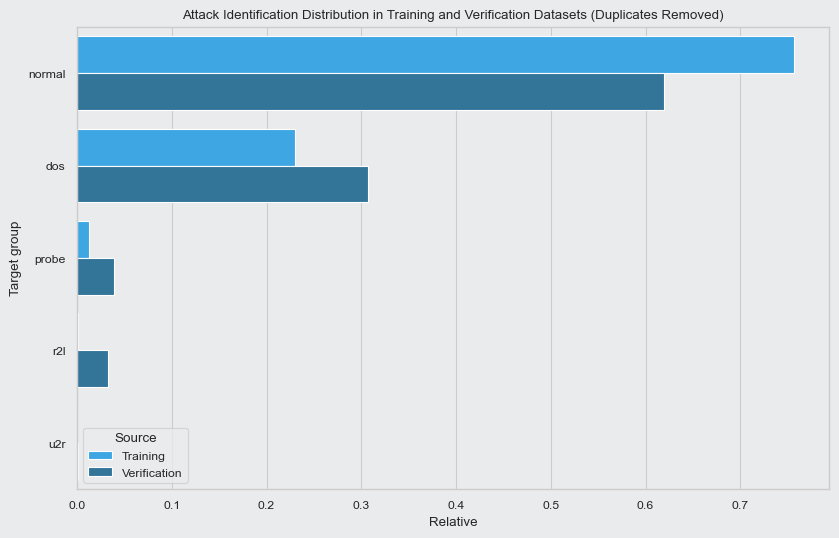

In [23]:
sns.barplot(target_classification_barplot_data_, x='Relative', y=Col.target_classification, hue='Source', palette=Colors.blues2)
plt.title('Attack Identification Distribution in Training and Verification Datasets (Duplicates Removed)')
plt.show()

By looking at this graphic, we see that we have almost no data in the training dataset to introduce `r2l` and `u2r` to our models, and barely some for the `probe` class!
We will proceed keeping the objectives stated earlier, although expecting our models to have a hard time to perform reliably on the classification task altogether.

The presence of at least `probe` and `r2l` in the verification dataset, however, hints towards their significance in so far as to not simply remove them altogether from our problem.

## Missing Values

Luckily we don't need to deal with missing entries: our datasets doesn't contain any.

In [24]:
total_missing_training = training_data.drop('Source', axis=1).isnull().sum()
relative_missing_training = (total_missing_training / num_training_records * 100.)
print('-- Missing Entries in the Training Dataset --')
pd.concat([total_missing_training, relative_missing_training], axis=1, keys=['Total', 'Percent']).transpose()

-- Missing Entries in the Training Dataset --


,Duration (s),Protocol Type,Service,Flag,#Bytes from source to destination,#Bytes from destination to source,"Same host/ port? (0 - No, 1 - Yes)",#Wrong Fragments,#Urgent packets,#Hot indicators,...,% of same-host connections from destination to different services,% of same-host connections from destination to the same service and port,% of same-service connections from destination to different hosts,% of same-host connections from destination with `SYN` errors,% of same-service connections from destination with `SYN` errors,% of same-host connections from destination with `REJ` errors,% of same-service connections from destination with `REJ` errors,Target type,Target group,Is attack?
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
total_missing_verification = verification_data.drop('Source', axis=1).isnull().sum()
relative_missing_verification = (total_missing_verification / num_verification_records * 100.)
print('-- Missing Entries in the Verification Dataset --')
pd.concat([total_missing_verification, relative_missing_verification], axis=1, keys=['Total', 'Percent']).transpose()

-- Missing Entries in the Verification Dataset --


,Duration (s),Protocol Type,Service,Flag,#Bytes from source to destination,#Bytes from destination to source,"Same host/ port? (0 - No, 1 - Yes)",#Wrong Fragments,#Urgent packets,#Hot indicators,...,% of same-host connections from destination to different services,% of same-host connections from destination to the same service and port,% of same-service connections from destination to different hosts,% of same-host connections from destination with `SYN` errors,% of same-service connections from destination with `SYN` errors,% of same-host connections from destination with `REJ` errors,% of same-service connections from destination with `REJ` errors,Target type,Target group,Is attack?
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Distribution of Categorical Features

Let's have a deeper look into the distribution of each of the different features, starting with the categorical ones.
Four our ML part later we will need to encode those.
But for now we are simply interested in their distributions in the training and verification datasets.

> **Remark**<br/>
> Moving forward, we will only operate on the datasets where the duplicates have been removed.

In [26]:
# Identifying categorical columns
categorical_data = combined_data_.select_dtypes('object')
categorical_data.head()

,Protocol Type,Service,Flag,Target type,Target group,Source
0,tcp,http,SF,normal,normal,Training
1,tcp,http,SF,normal,normal,Training
2,tcp,http,SF,normal,normal,Training
3,tcp,http,SF,normal,normal,Training
4,tcp,http,SF,normal,normal,Training


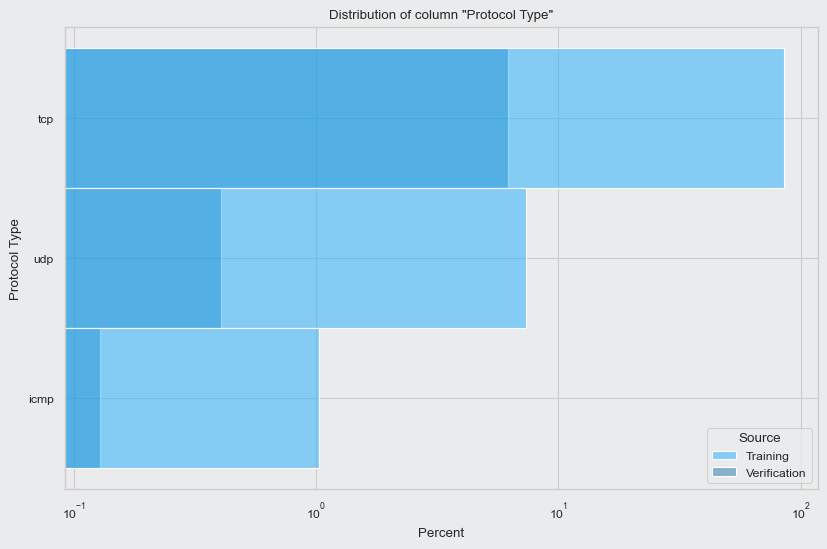

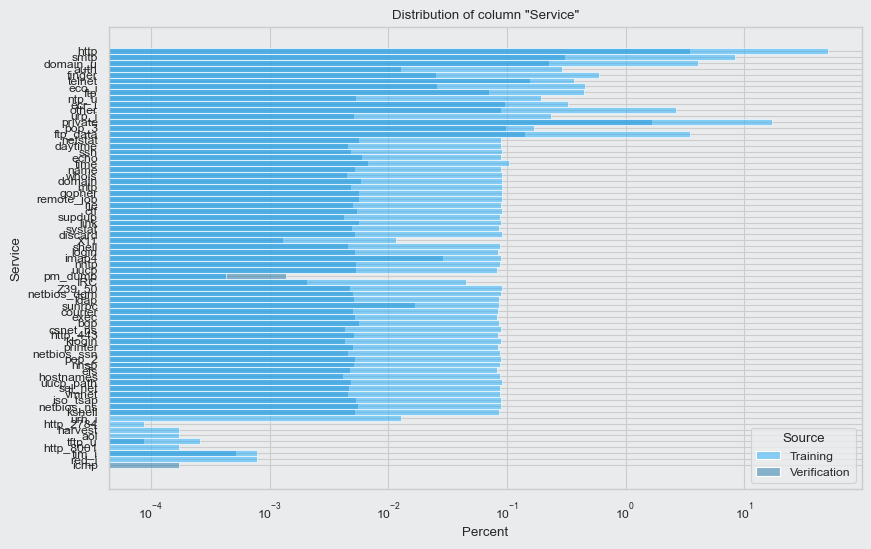

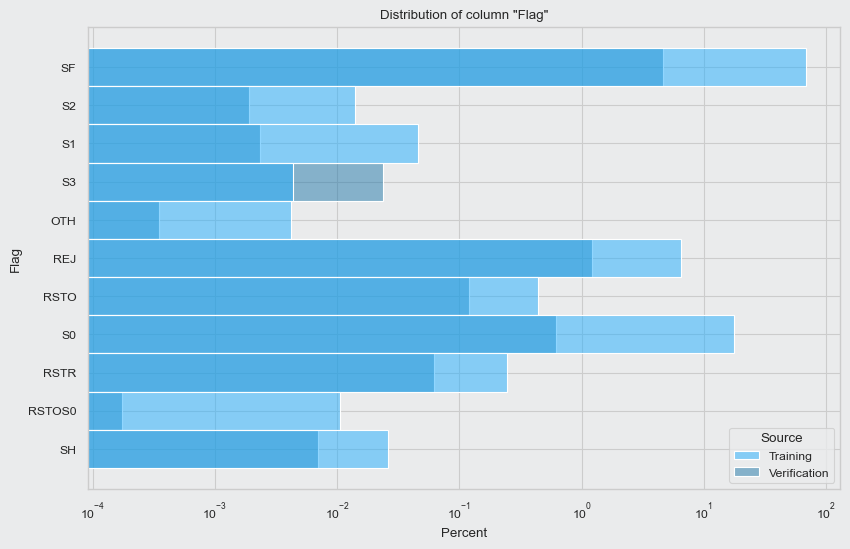

In [27]:
# Visualize the distributions using a countplot
for column in categorical_data.columns[:3]:     # leave out the other colums; we already covered those
    sns.histplot(data=categorical_data, y=column, hue='Source', palette=Colors.blues2, stat='percent')
    plt.title(f'Distribution of column "{column}"')
    plt.xscale('log')
    plt.show()

We use a logarithmic $x$-axis scale again to illustrate all of the present data.
This confirms once again what we already figured out: some sets of data dominate all the other features by far.

Other than that, we see that there's a wide range of services that are distributed uniformly with percentages shyly below $0.1%$.
But we gain no further insight in terms of what to look out for for attack identification and classification just from that.

If we look at the most dominant cases in each of those graphics, we could expect to find a strong correlation with one of the two target columns for some of those features.
Since none of the protocol types' distribution matches one of the target columns', this is probably not going to be a telling feature.
But for the `Service`, the fact that there are a few very dominant ones matches with our previous observation that the DOS attack group is strongly represented as well.
Indeed, we find:

In [28]:
# Identify most dominant services in training data
top_5_services = training_data_.value_counts('Service').sort_values(ascending=False).index.tolist()[:5]

# Check on how many DOS attacks use one of those services:
attack_training_data = training_data_[training_data_[Col.target_identification]]                # subset of training data that does represent an attack
attack_verification_data = verification_data_[verification_data_[Col.target_identification]]    # subset of verification data that does represent an attack
n_attack_training = len(attack_training_data)                                                   # attacks in training dataset
n_attack_verification = len(attack_verification_data)                                           # attacks in verification dataset

# Compute and print out the findings
print(f'\t\tTrainig\t\t\tVerification')
print(f'Service\t\tDOS (%)\tOther (%)\tDOS (%)\tOther (%)')
for service in top_5_services:
    tabs = '\t' if len(service) > 4 else '\t\t'                                                 # spaces after the first column
    training_subset     = attack_training_data[attack_training_data.Service==service]
    verification_subset = attack_verification_data[attack_verification_data.Service==service]
    n_dos_training = len(training_subset[training_subset[Col.target_classification]=='dos'])    # number of instances of `service` and DOS
    n_oth_training = len(training_subset[training_subset[Col.target_classification]!='dos'])    # number of instances of `service` and not DOS
    n_dos_verification = len(verification_subset[verification_subset[Col.target_classification]=='dos'])    # number of instances of `service` and DOS
    n_oth_verification = len(verification_subset[verification_subset[Col.target_classification]!='dos'])    # number of instances of `service` and not DOS
    print(f'  {service}{tabs}{n_dos_training/n_attack_training*100.:.2f}\t{n_oth_training/n_attack_training*100.:.2f}\t\t{n_dos_verification/n_attack_verification*100.:.2f}\t{n_oth_verification/n_attack_verification*100:.2f}')

print("\nPercentages relative to overall attacks in respective datasets.")

		Trainig			Verification
Service		DOS (%)	Other (%)	DOS (%)	Other (%)
  http		1.05	0.01		4.33	0.02
  private	71.26	2.30		58.91	3.23
  smtp		0.43	0.02		1.23	0.03
  domain_u	0.00	0.00		0.00	0.01
  ftp_data	0.67	0.26		0.28	1.73

Percentages relative to overall attacks in respective datasets.


This confirms that the `private` service is the preferred one for DOS-type attacks - although not the only one.
For `http` (website) and `smtp` (email) protocols, we find that the amount of DOS attacks is bigger than those of other attacks by magnitudes, but they are a farcry from what's going on on `private` connections.

Doing a similar analysis for the top 3 of the `Flag` features (1% or more in the training dataset) yields this:

In [29]:
# Identify most dominant flags in training data
top_3_flags = training_data_.value_counts('Flag').sort_values(ascending=False).index.tolist()[:3]

# Compute and print out the findings
print(f'\t\tTrainig\t\t\tVerification')
print(f'Flag\t\tDOS (%)\tOther (%)\tDOS (%)\tOther (%)')
for flag in top_3_flags:
    training_subset     = attack_training_data[attack_training_data.Flag==flag]
    verification_subset = attack_verification_data[attack_verification_data.Flag==flag]
    n_dos_training = len(training_subset[training_subset[Col.target_classification]=='dos'])    # number of instances of `service` and DOS
    n_oth_training = len(training_subset[training_subset[Col.target_classification]!='dos'])    # number of instances of `service` and not DOS
    n_dos_verification = len(verification_subset[verification_subset[Col.target_classification]=='dos'])    # number of instances of `service` and DOS
    n_oth_verification = len(verification_subset[verification_subset[Col.target_classification]!='dos'])    # number of instances of `service` and not DOS
    print(f'  {flag}\t\t{n_dos_training/n_attack_training*100.:.2f}\t{n_oth_training/n_attack_training*100.:.2f}\t\t{n_dos_verification/n_attack_verification*100.:.2f}\t{n_oth_verification/n_attack_verification*100:.2f}')

print("\nPercentages relative to overall attacks in respective datasets.")

		Trainig			Verification
Flag		DOS (%)	Other (%)	DOS (%)	Other (%)
  SF		1.91	2.82		7.80	12.09
  S0		77.10	0.39		23.44	0.98
  REJ		13.59	1.33		43.46	3.99

Percentages relative to overall attacks in respective datasets.


In this case, `S0` and `REJ` seem to be the telling flags for the DOS attack category.
`S0` more so than `REJ`, as less than one percent of attacks with this flag are categorized as something other than a DOS attack.

## Binary Feature Distribution

Next, we will look into the binary features.
The column names give away which feature is meant to be a binary column: if it contains a question mark (`?`), it's a binary column.
(The naming has been chosen explicitly to reflect that: `?` for binary/ Yes-No scenarios.)

In [30]:
binary_columns = list(filter(lambda column: '?' in column, combined_data_.columns))
binary_data = combined_data_[binary_columns]
binary_data.head()

,"Same host/ port? (0 - No, 1 - Yes)","Logged in? (0 - No, 1 - Yes)","Is root shell obtained? (0 - No, 1 - Yes)","Is `su` command attempted? (0 - No, 1 - Yes)","Login belongs to host list? (0 - No, 1 - Yes)","Login belongs to guest list? (0 - No, 1 - Yes)",Is attack?
0,0,1,0,0,0,0,False
1,0,1,0,0,0,0,False
2,0,1,0,0,0,0,False
3,0,1,0,0,0,0,False
4,0,1,0,0,0,0,False


A graphical representation will yield little insight; many of those features live on the extreme edges of our value range, very close to $0\%$ and very close to $100\%$.

Thus, a written form similar to what we had earlier will be more telling.

In [31]:
n_total = len(combined_data_)
n_attack = len(combined_data_[combined_data_[Col.target_identification]])
n_dos = len(combined_data_[combined_data_[Col.target_classification]=='dos'])

print('# Value 0\t\t# Value 1\t\tFeature')
for feature in binary_columns:
    counts = combined_data_[feature].value_counts()
    n0 = counts[0] if feature != Col.target_identification else counts[False]
    n1 = counts[1] if feature != Col.target_identification else counts[True]
    tabs = '\t\t' if n0 < 1.e6 else '\t'
    print(f'{n0} ({n0/n_total*100.:.2f}%){tabs}{n1} ({n1/n_total*100.:.2f}%)\t\t{feature}')

# Value 0		# Value 1		Feature
1152248 (100.00%)	35 (0.00%)		Same host/ port? (0 - No, 1 - Yes)
429699 (37.29%)		722584 (62.71%)		Logged in? (0 - No, 1 - Yes)
1151896 (99.97%)	387 (0.03%)		Is root shell obtained? (0 - No, 1 - Yes)
1152168 (99.99%)	43 (0.00%)		Is `su` command attempted? (0 - No, 1 - Yes)
1152269 (100.00%)	14 (0.00%)		Login belongs to host list? (0 - No, 1 - Yes)
1147459 (99.58%)	4824 (0.42%)		Login belongs to guest list? (0 - No, 1 - Yes)
860727 (74.70%)		291556 (25.30%)		Is attack?


In [32]:
print('# Value 0\t% Total\t% Attack % DOS\t\t# Value 1\t% Total\t% Attack % DOS\t\tFeature')
for feature in binary_columns:
    counts = combined_data_[feature].value_counts()
    n0 = counts[0] if feature != Col.target_identification else counts[False]
    n1 = counts[1] if feature != Col.target_identification else counts[True]
    print(f'{n0}\t\t{n0/n_total*100.:.2f}\t{n0/n_attack*100.:.2f}\t {n0/n_dos*100.:.2f}\t\t{n1}\t\t{n1/n_total*100.:.2f}\t{n1/n_attack*100.:.2f}\t {n1/n_dos*100.:.2f}\t\t{feature}')

print('\n% Total:  relative to *all* records.')
print('% Attack: relative to number of attack records')
print('% DOS:    relative to DOS-type attacks')

# Value 0	% Total	% Attack % DOS		# Value 1	% Total	% Attack % DOS		Feature
1152248		100.00	395.21	 425.16		35		0.00	0.01	 0.01		Same host/ port? (0 - No, 1 - Yes)
429699		37.29	147.38	 158.55		722584		62.71	247.84	 266.62		Logged in? (0 - No, 1 - Yes)
1151896		99.97	395.09	 425.03		387		0.03	0.13	 0.14		Is root shell obtained? (0 - No, 1 - Yes)
1152168		99.99	395.18	 425.13		43		0.00	0.01	 0.02		Is `su` command attempted? (0 - No, 1 - Yes)
1152269		100.00	395.21	 425.17		14		0.00	0.00	 0.01		Login belongs to host list? (0 - No, 1 - Yes)
1147459		99.58	393.56	 423.39		4824		0.42	1.65	 1.78		Login belongs to guest list? (0 - No, 1 - Yes)
860727		74.70	295.22	 317.60		291556		25.30	100.00	 107.58		Is attack?

% Total:  relative to *all* records.
% Attack: relative to number of attack records
% DOS:    relative to DOS-type attacks


This overview, while nice to know, doesn't give us much in terms of deriving insights into the nature of attacks.
Again, this is primarily due to looking at extreme sides of the spectrum, with either almost everything or nothing being on one side or the other.
Exceptions to this statement are `Is attack?`, which is one of the targets and not one of the features our models can learn from, `Logged in? (0 - No, 1 - Yes)` and maybe even `Login belongs to guest list? (0 - No, 1 - Yes)`.
But being logged in or not is not a criterium for an attack, nor indicating a DOS attack, so we learn nothing new here.
On the other hand-side, being logged in as a host makes it unlikely for a record to be an attack in the first place.
Well, this statement is to be taken with caution: we're looking only at the most dominant DOS attack class; the issues arising with being logged in as a host but with a malicious intent are tied to the `u2r` class, for which we have much less data!

In [33]:
# Find the percentage of logged-in hosts that are `u2r` attacks:
u2r_attacks = combined_data_[combined_data_[Col.target_classification]=='u2r']

print(f'Number of U2R attacks:               {len(u2r_attacks)}')
print(f'Of those, number of logins as host:  {(u2r_hosts := len(u2r_attacks["Login belongs to host list? (0 - No, 1 - Yes)"]))} ({u2r_hosts/len(u2r_attacks)*100.:.2f}%)')

Number of U2R attacks:               109
Of those, number of logins as host:  109 (100.00%)


This observation makes a positive entry in the `Login belongs to host list? (0 - No, 1 - Yes)` column a necessary condition for a U2R attack, but not a sufficient one.

## Numerical Feature Distribution

Whats left are the columns that represents counters (indicated with a hash (`#`) in their name) and percentages (indicated with a percent symbol (`%`) in their name).

Now, for those we *can* use graphical representations.
The procedure is straight-forward:

In [34]:
# Collect the counter features
counter_features = list(filter(lambda column: '#' in column, combined_data_.columns))
counter_data = combined_data_[counter_features + ['Source']]

# Collect the percentage features
percent_features = list(filter(lambda column: '%' in column, combined_data_.columns))
percent_data = combined_data_[percent_features + ['Source']]

In [35]:
counter_data.head()

,#Bytes from source to destination,#Bytes from destination to source,#Wrong Fragments,#Urgent packets,#Hot indicators,#Failed login attempts,#Compromised Conditions,#Root accesses,#File creation operations,#Shell prompts,#Operations on access control files,#Outbound commands in ftp session,#Connections to same host in past 2s,#Connections to same host and service in past 2s,#Connections to same host from destination in past 2s,#Connections to same host and service from destination in past 2s,Source
0,215,45076,0,0,0,0,0,0,0,0,0,0,1,1,0,0,Training
1,162,4528,0,0,0,0,0,0,0,0,0,0,2,2,1,1,Training
2,236,1228,0,0,0,0,0,0,0,0,0,0,1,1,2,2,Training
3,233,2032,0,0,0,0,0,0,0,0,0,0,2,2,3,3,Training
4,239,486,0,0,0,0,0,0,0,0,0,0,3,3,4,4,Training


In [36]:
percent_data.head()

,% of same-host connections with `SYN` errors,% of same-service connections with `SYN` errors,% of same-host connections with `REJ` errors,% of same-service connections with `REJ` errors,% of same-host connections to the same service,% of same-host connections to different services,% of same-service connections to different hosts,% of same-host connections from destination to the same service,% of same-host connections from destination to different services,% of same-host connections from destination to the same service and port,% of same-service connections from destination to different hosts,% of same-host connections from destination with `SYN` errors,% of same-service connections from destination with `SYN` errors,% of same-host connections from destination with `REJ` errors,% of same-service connections from destination with `REJ` errors,Source
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,Training
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,Training
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,Training
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,Training
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,Training


For showcasing the counter data we can use boxplots:

/var/folders/yx/bw2wb6890tsb79vs_n2wcbsh0000gn/T/ipykernel_32776/4082893040.py:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


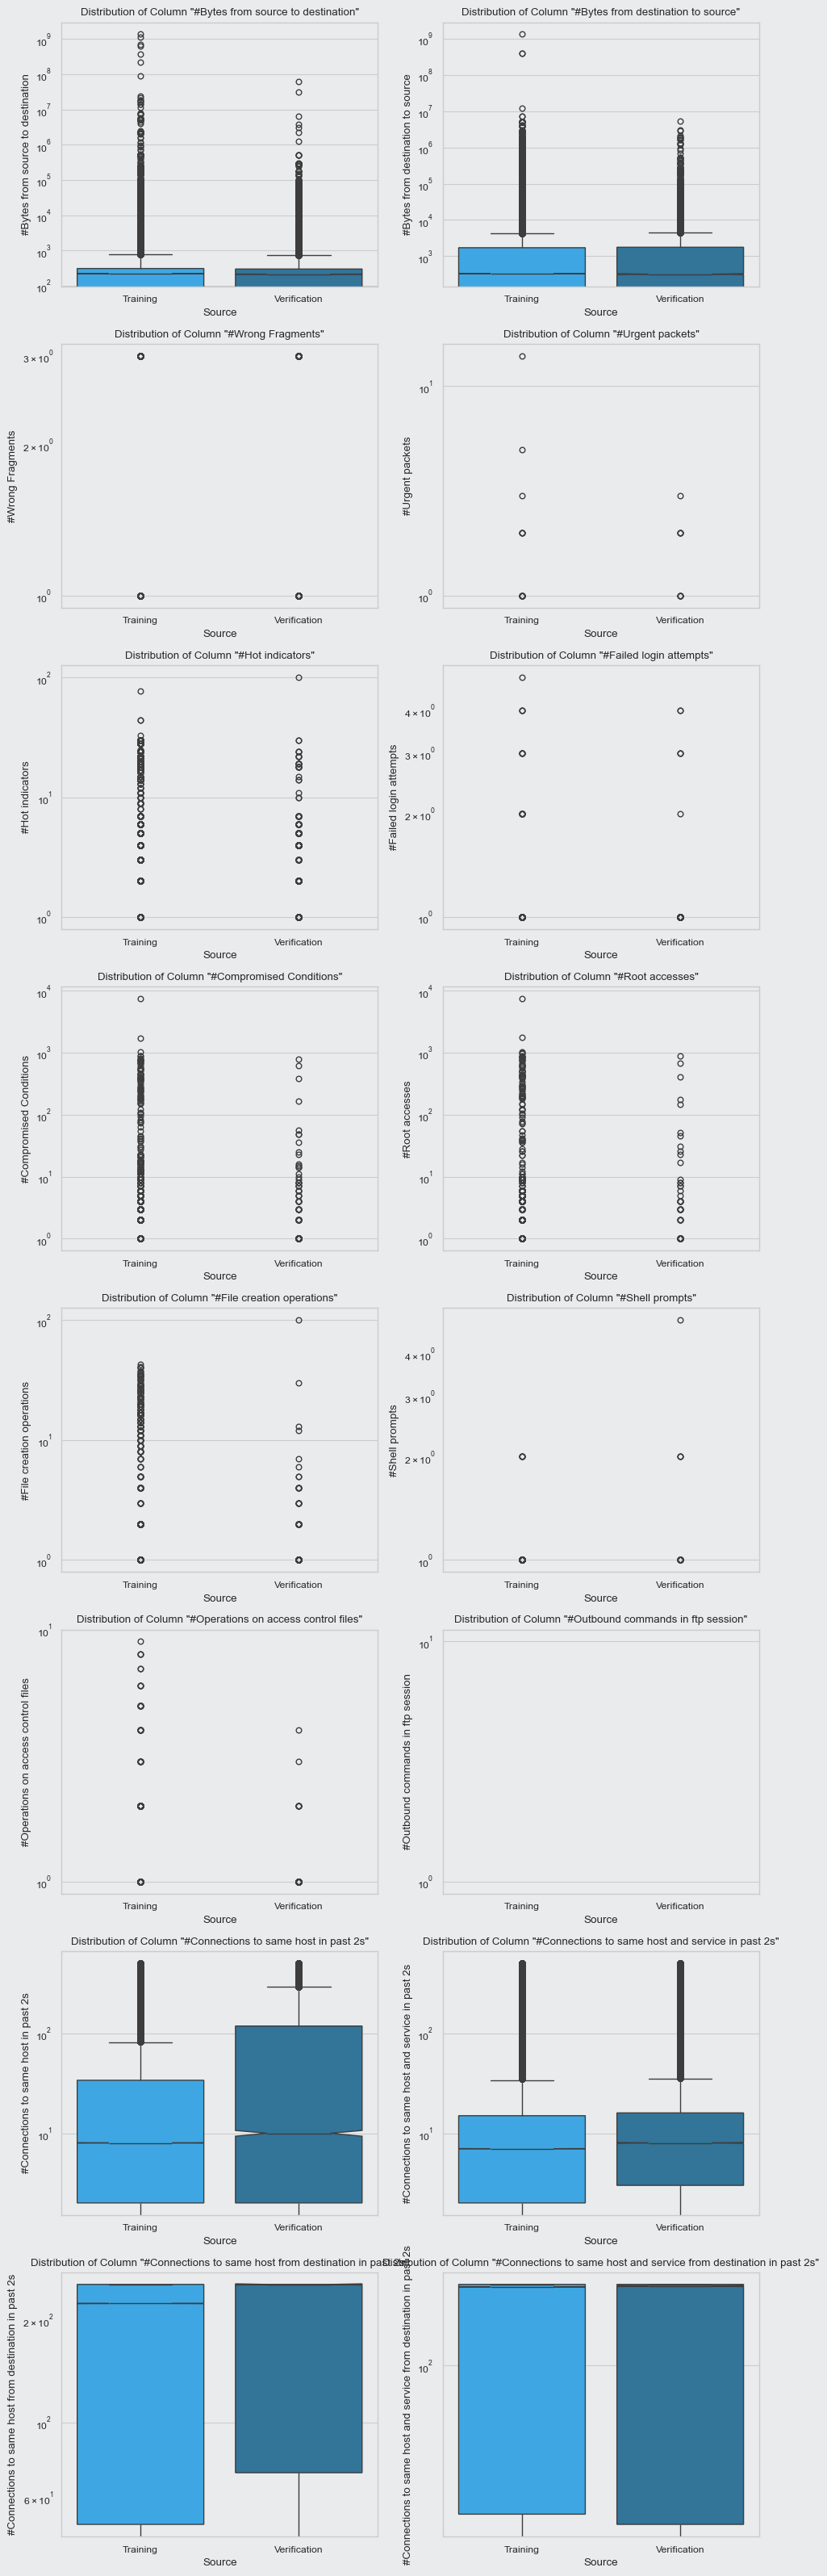

In [37]:
columns = 2
rows = round(len(counter_features) / float(columns))

plt.figure(figsize=(1.6*6, 4*rows))

for index, column in enumerate(counter_features):
    plt.subplot(rows, columns, index+1)
    sns.boxplot(data=counter_data, x='Source', y=column, hue='Source', palette=Colors.blues2, legend=False, notch=True)
    plt.yscale('log')
    plt.title(f'Distribution of Column "{column}"')

plt.tight_layout()
plt.show()

Did you notice the warning regarding the logarithmic scaling of the `#Outbound commands in ftp session`?
This is due to the fact that the *entire* dataset, consisting of both the training and the verification data, has just one unique entry for this column:

In [38]:
counter_data['#Outbound commands in ftp session'].unique()

array([0])

Once again, we find that the distributions in the training and the verification dataset diverge in some cases and in others we only get to see the "outliers".

Regarding the term "outliers" in this context:
While we could define a measure or threshold for labelling an outlier, we know neither the true nature of distributions of features of our datasets, nor do we know at this point how important they are for identifying our targets.
All that we *do* know is that our targets' representations in both training and verification datasets are highly imbalanced and considering that, for instance, the `u2r` class only has 109 records in both training and verification datasets combined, we might need every record of he minority classes for our models.
Thus, if we'd want to remove outliers, we probably only want to do so on the majority class(es).

Note that, similar to the credit card dataset, we find no normally distributed feature here.
The two bottom plots might obscure it due to the logarithmic scaling of the $y$-axis, of course, so let's look at those in an unscaled fashion and convince ourselves.

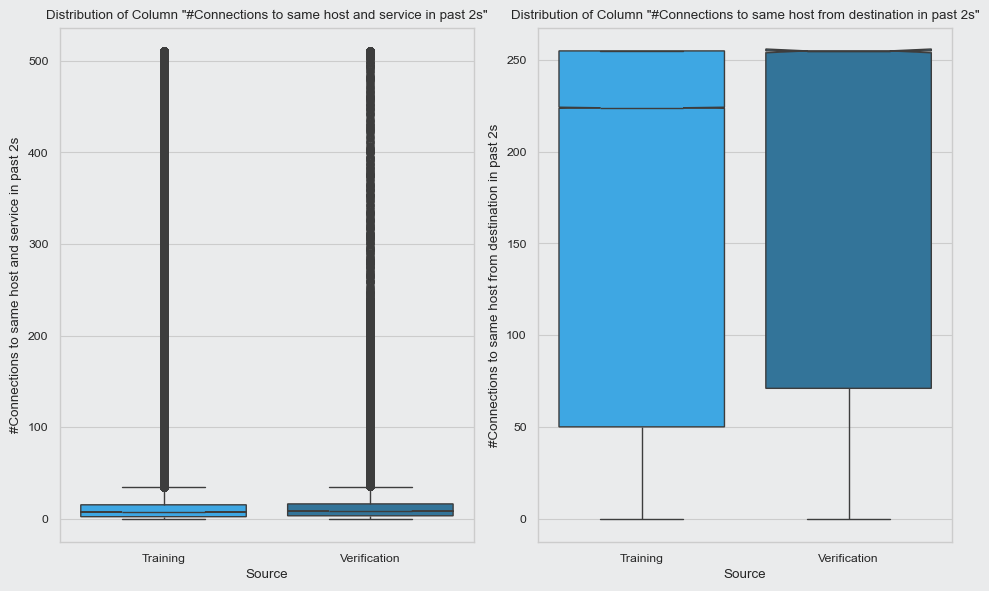

In [39]:
for index, column in enumerate(counter_features[-3:-1]):
    plt.subplot(1, columns, index+1)
    sns.boxplot(data=counter_data, x='Source', y=column, hue='Source', palette=Colors.blues2, legend=False, notch=True)
    plt.title(f'Distribution of Column "{column}"')

plt.tight_layout()
plt.show()

## Feature Correlation

Before we begin to set up our datasets for the machine learning part, let's have a look at how the features correlate with each other.
We are going to visualize the correlation coefficient of each feature with the other using a heat map.

Of course, this only works for numeric features. And while we could label-encode the others at this point to generate numbers for the others, they would yield no information at this point.
The correlation coefficient is a measure for the linear correlation of features, it would make no sense to compute such a thing on labels.

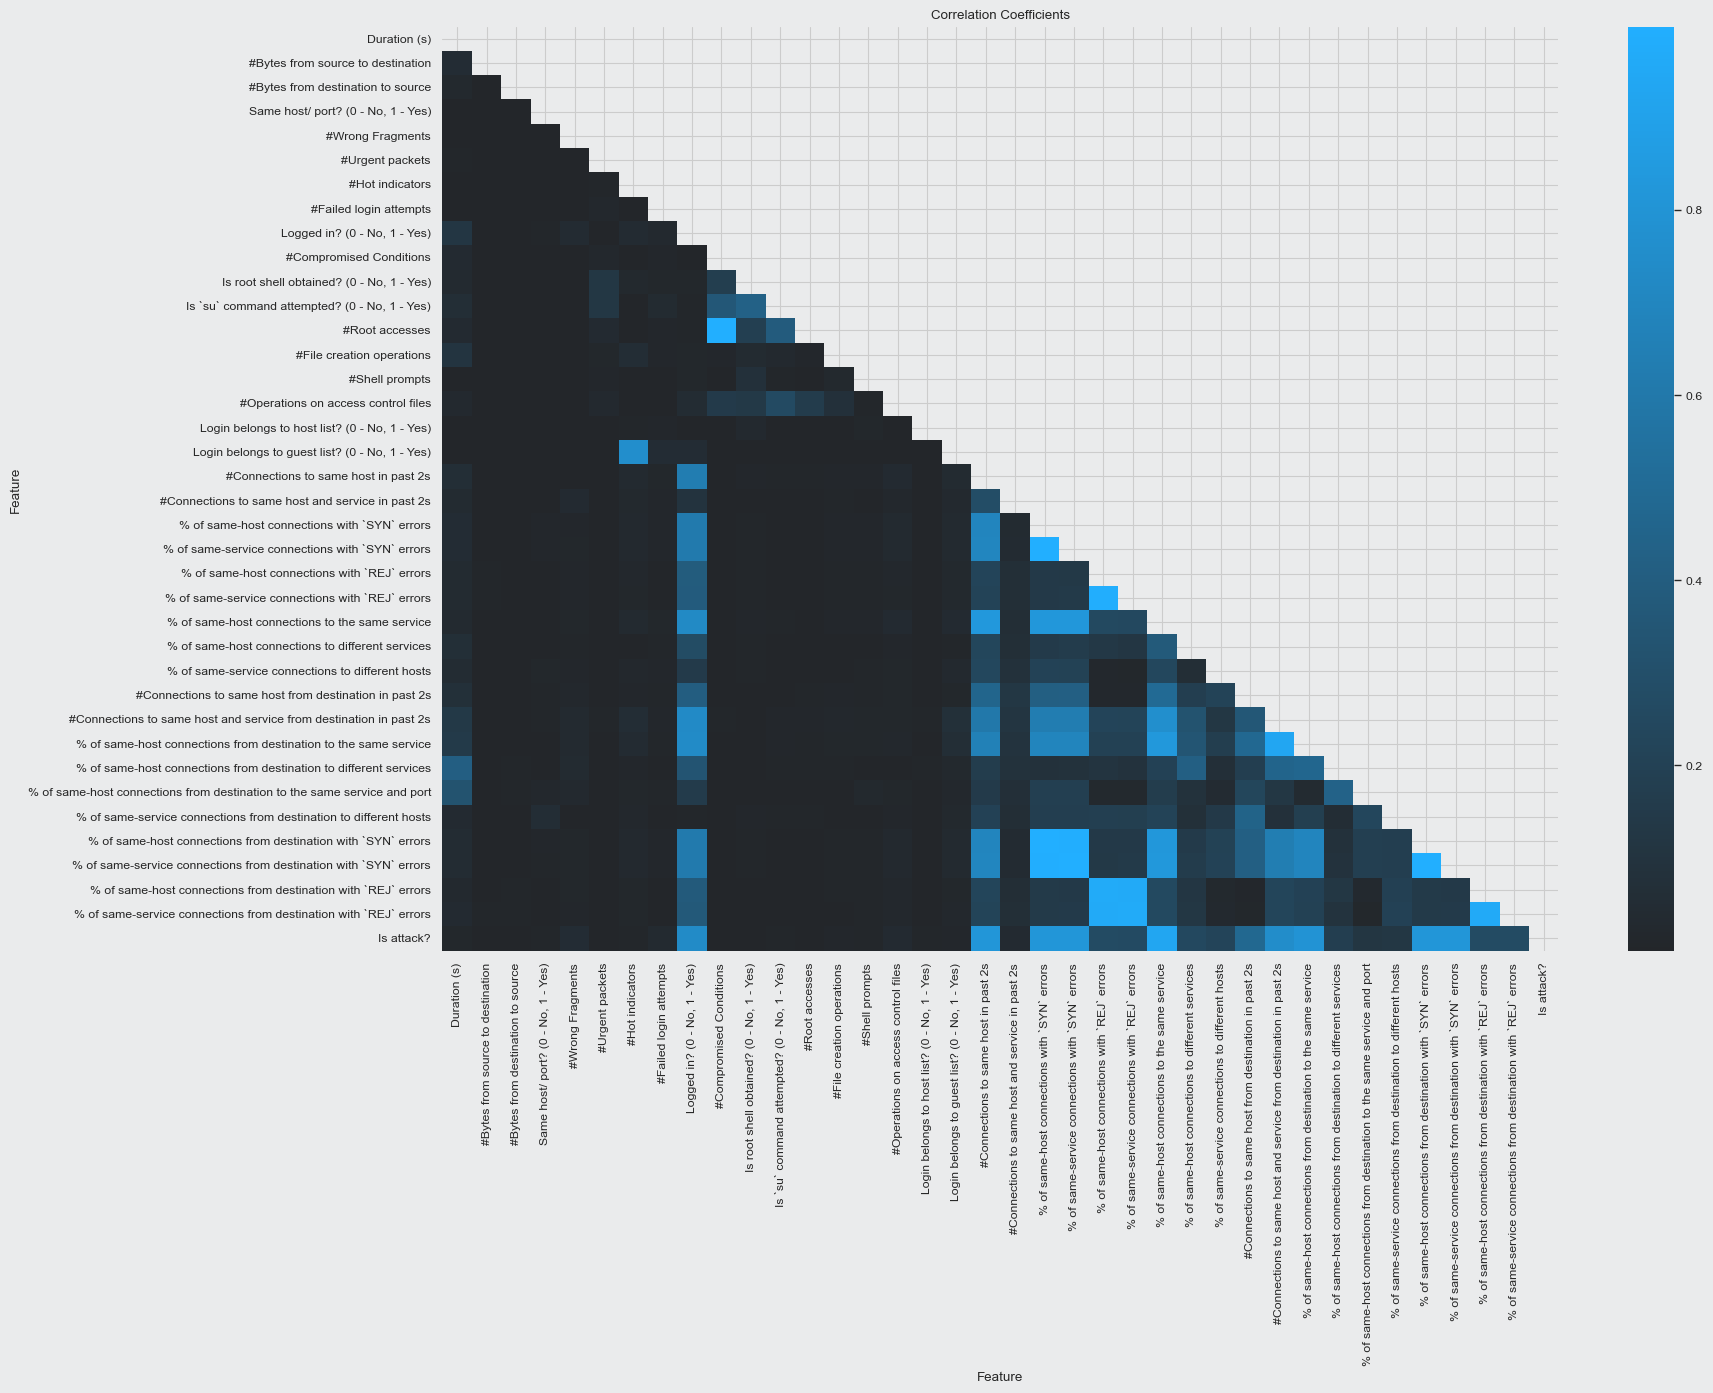

In [40]:
heat_data = abs(combined_data_.drop('#Outbound commands in ftp session', axis=1).corr(numeric_only=True))
mask = np.zeros_like(heat_data)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(18, 12))
sns.heatmap(
    data=heat_data,
    cmap=Colors.blues_c,
    mask=mask
)
plt.title('Correlation Coefficients')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.show()

There are quite some highly correlated values to be found.
For instance `#Root access` and `#Compromised conditions`, or each of the `%` columns with a specific error type.
This comes to no surprise, but it allows us to hand-pick the features we want to include for our model prototypes;
we will exclude those that highly correlate with each other, since they essentially carry the same information.
And we already ruled out the `#Outbound commands in ftp session` columns since this one carries no information at all.

As for what to include in our collection of reduced features, we will discuss that in the next section.

## Preparing the Training and Testing Datasets

Unlike in the previous case with the credit card dataset we don't need to split training and verification data here.
But we do need to consider scaling, encoding, feature reduction and resampling.
We will do so separately for the two distinct tasks of attack identification and classification.

Let's begin with attack identification:

### Preprocessing for Attack Identification

For this task, the `Is attack?` column is our target and we drop the `Target type`, `Target group` (and of course the `Source` and `#Outbound commands in ftp session`) columns from our dataframes for the input.

In [41]:
training_data_attack_identification = training_data_.drop([Col.target_type, Col.target_classification, 'Source', '#Outbound commands in ftp session'], axis=1)
verification_data_attack_identification = verification_data_.drop([Col.target_type, Col.target_classification, 'Source', '#Outbound commands in ftp session'], axis=1)

Since we have already seen that roughly $25\%$ of records in the training and approximately $38\%$ of the verification dataset are attacks there is no immediate need to rebalance the datasets; our models should be able to learn from this distribution well enough.
We could discuss to resample them just for reducing the workload and improve computation time if we so chose, but it would be better to achieve this by smartly selecting features to exclude rather than records for we might otherwise lose the information of insightful patterns for our models.

The next important step is encoding the categorical features.
We have two options: label encodinig (using `sklearn.preprocessing.LabelEncoder`) replaces each category with an integer, like the index of said category in a  registry of some sorts.
One-hot encoding (using `pandas.get_dummies()`), on the other hand, creates one new boolean column for each category.
The former *might* give the models the impression there's some sort of a ranking or a metric underneath those features while in truth that's not the case.
However, it would be the preferred approach for cases for which there are a lot of categories, since one-hot would blow up our data frames otherwise while, in turn, preventing our models from assuming there to be a quantifiable relation between the categories.

Since we have the computational power, though, there's no reason to realize both attempts and compare the results, at least for our prototype models.

In [42]:
# -- Label Encoding --
from sklearn.preprocessing import LabelEncoder

categorical_columns = training_data_attack_identification.select_dtypes('object').columns

# The encoder must be fit on a dataset that contains all relevant features
combined_data_attack_identification = combined_data_.drop([Col.target_classification, Col.target_type, '#Outbound commands in ftp session'], axis=1)
# Note: we leave the `Source` in for the one-hot encoding part further down below

# Create copies of the data frames to encode
training_data_attack_identification_label = training_data_attack_identification.copy()
verification_data_attack_identification_label = verification_data_attack_identification.copy()

# Encode each of the categorical columns
for column in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(combined_data_attack_identification[column])
    training_data_attack_identification_label[column]       = encoder.transform(training_data_attack_identification[column])
    verification_data_attack_identification_label[column]   = encoder.transform(verification_data_attack_identification[column])

# Check the result
training_data_attack_identification_label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074992 entries, 0 to 4898430
Data columns (total 41 columns):
 #   Column                                                                    Non-Null Count    Dtype  
---  ------                                                                    --------------    -----  
 0   Duration (s)                                                              1074992 non-null  int64  
 1   Protocol Type                                                             1074992 non-null  int64  
 2   Service                                                                   1074992 non-null  int64  
 3   Flag                                                                      1074992 non-null  int64  
 4   #Bytes from source to destination                                         1074992 non-null  int64  
 5   #Bytes from destination to source                                         1074992 non-null  int64  
 6   Same host/ port? (0 - No, 1 - Yes)             

Alright, only `float` and `int` columns left (besides our boolean target column). Perfect.
Now, let's repeat the procedure with one-hot encoding.
We need to be a bit careful here in order to have the same feature sets in both the training and verification data.
For that, we re-use the previous `combined_data_attack_identification` frame:

In [50]:
# -- One-hot encoding --
combined_data_attack_identification_1hot = pd.get_dummies(combined_data_attack_identification)
training_data_attack_identification_1hot = combined_data_attack_identification_1hot[combined_data_attack_identification_1hot.Source_Training].drop(['Source_Training', 'Source_Verification'], axis=1)
verification_data_attack_identification_1hot = combined_data_attack_identification_1hot[combined_data_attack_identification_1hot.Source_Verification].drop(['Source_Training', 'Source_Verification'], axis=1)

# Check the result
training_data_attack_identification_1hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074992 entries, 0 to 4898430
Columns: 123 entries, Duration (s) to Flag_SH
dtypes: bool(86), float64(15), int64(22)
memory usage: 399.8 MB


Well, looking at the number of columns, that one is a beast... (As expected, though.)
But we got what we came for.

Finally, in terms of preparing the datasets, we need to consider scaling.
We have two types of features that could be scaled: the two numeric ones (percentages and counters).
For the same reason we employ one-hot encoding for categorical features we don't want to scale the binary columns.

In [51]:
# -- Scaling Numeric Columns --
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# To emulate realistic behaviour, let's assume we have only our training data to fit the scaler on
numeric_columns = list(filter(lambda feature: feature != '#Outbound commands in ftp session', percent_features + counter_features))
scaler.fit(training_data_attack_identification[numeric_columns])

# Create copies of the data to perform the scaling on
training_data_attack_identification_scaled        = training_data_attack_identification.copy()
training_data_attack_identification_1hot_scaled   = training_data_attack_identification_1hot.copy()
training_data_attack_identification_label_scaled  = training_data_attack_identification_label.copy()
verification_data_attack_identification_scaled         = verification_data_attack_identification.copy()
verification_data_attack_identification_1hot_scaled    = verification_data_attack_identification_1hot.copy()
verification_data_attack_identification_label_scaled   = verification_data_attack_identification_label.copy()

# Transform all numeric columns using the prepared scaler
training_data_attack_identification_scaled[numeric_columns]       = scaler.transform(training_data_attack_identification[numeric_columns])
training_data_attack_identification_1hot_scaled[numeric_columns]  = training_data_attack_identification_scaled[numeric_columns]
training_data_attack_identification_label_scaled[numeric_columns] = training_data_attack_identification_scaled[numeric_columns]
verification_data_attack_identification_scaled[numeric_columns]        = scaler.transform(verification_data_attack_identification[numeric_columns])
verification_data_attack_identification_1hot_scaled[numeric_columns]   = verification_data_attack_identification_scaled[numeric_columns]
verification_data_attack_identification_label_scaled[numeric_columns]  = verification_data_attack_identification_scaled[numeric_columns]

And this is it.
This is our data for the task of identifying an attack.
All that's left now is to store all these dataframes as `.csv` files and then have a look at selected correlations with the target column to select a feature set for our prototypes to learn from in the initial ML phase.

In [52]:
from os import path

if not path.exists(util.File.training_attack_identification):
    training_data_attack_identification.to_csv(util.File.training_attack_identification, index=False)
if not path.exists(util.File.verification_attack_identification):
    verification_data_attack_identification.to_csv(util.File.verification_attack_identification, index=False)
if not path.exists(util.File.training_attack_identification_label):
    training_data_attack_identification_label.to_csv(util.File.training_attack_identification_label, index=False)
if not path.exists(util.File.verification_attack_identification_label):
    verification_data_attack_identification_label.to_csv(util.File.verification_attack_identification_label, index=False)
if not path.exists(util.File.training_attack_identification_1hot):
    training_data_attack_identification_1hot.to_csv(util.File.training_attack_identification_1hot, index=False)
if not path.exists(util.File.verification_attack_identification_1hot):
    verification_data_attack_identification_1hot.to_csv(util.File.verification_attack_identification_1hot, index=False)
if not path.exists(util.File.training_attack_identification_scaled):
    training_data_attack_identification_scaled.to_csv(util.File.training_attack_identification_scaled, index=False)
if not path.exists(util.File.verification_attack_identification_scaled):
    verification_data_attack_identification_scaled.to_csv(util.File.verification_attack_identification_scaled, index=False)
if not path.exists(util.File.training_attack_identification_label_scaled):
    training_data_attack_identification_label_scaled.to_csv(util.File.training_attack_identification_label_scaled, index=False)
if not path.exists(util.File.verification_attack_identification_label_scaled):
    verification_data_attack_identification_label_scaled.to_csv(util.File.verification_attack_identification_label_scaled, index=False)
if not path.exists(util.File.training_attack_identification_1hot_scaled):
    training_data_attack_identification_1hot_scaled.to_csv(util.File.training_attack_identification_1hot_scaled, index=False)
if not path.exists(util.File.verification_attack_identification_1hot_scaled):
    verification_data_attack_identification_1hot_scaled.to_csv(util.File.verification_attack_identification_1hot_scaled, index=False)

For looking into the correlation factors with the target column we look at the training data exclusively.
Again, this is closer to the real case in which we have no information on the data our models are supposed to perform a prediction on.

We will go through a rough analysis for each of the preprocessed types of data:
- label encoded
- label encoded and scaled
- one-hot encoded
- one-hot encoded and scaled
We skip the plainly scaled case since we won't find a correlation coefficient for the categorical columns that aren't encoded there.

The procedure is straight-forward:

In [53]:
# Ignore features that highly correlate with other features.
from functools import reduce

def highly_correlated_columns(data, threshold):
    correlations = np.abs(data.corr())
    columns = data.columns
    return list(
        reduce(
            lambda accumulator, item: accumulator if item[0] in accumulator else accumulator.union(item[1]),    # collect new columns unless we already track their relatives
            [   # list: tuple of column and the features it has a high correlation coefficient with (other than itself)
                (column, correlations[(correlations > threshold) & (correlations < 1.0)][column].dropna().index.tolist())
                for column in columns
            ],
            set()   # start with an empty set, not the first element in the list
        )
    )

The function above returns a list of all columns with a correlation higher than the given `threshold` (ignoring the value $1.0$, that's the column's correlation with itself) with any other column except for the first representative it encounters.
That is, for the example from earlier when we noted that `#Root access` and `#Compromised conditions` strongly correlate with each other it would note `#Root access` for dropping because it encounters `#Compromised conditions` first in the column list and seeing that the former is one of the features it highly correlates with.
Later, when finding `#Root access` in the column list, it ignores the record since the column is already marked for dropping.

With that, we can look deeper into a correlation "ranking" for each training data setup.
First, we need to define a threshold for columns that we want to exclude.
Let's fix $0.975$ for that, hopefully retaining the important information but excluding essentially duplicated information sufficiently well.
(The value is arbitrarily chosen, mind.)

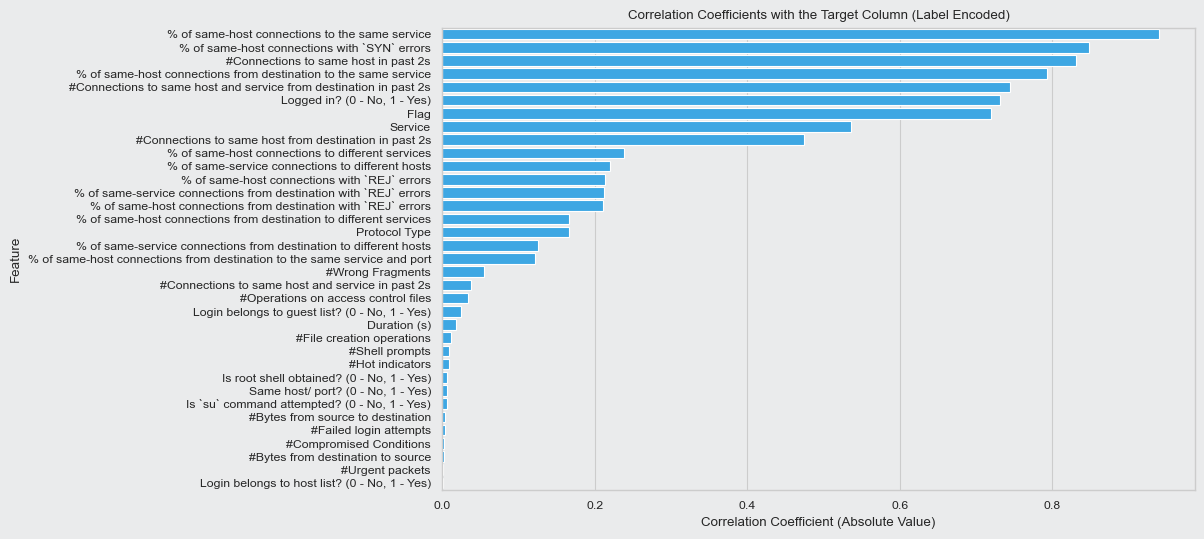

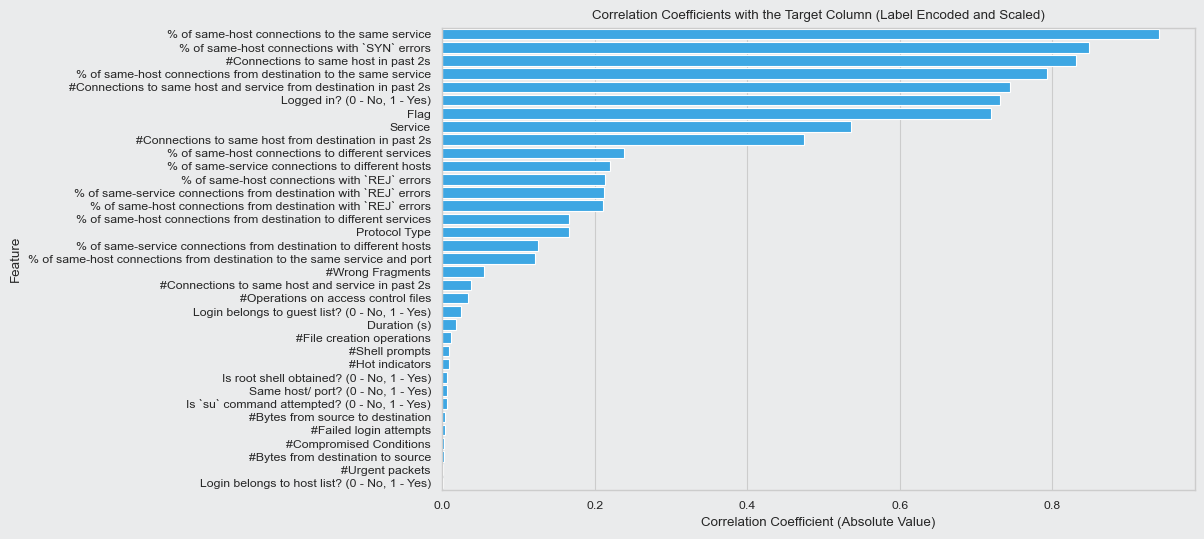

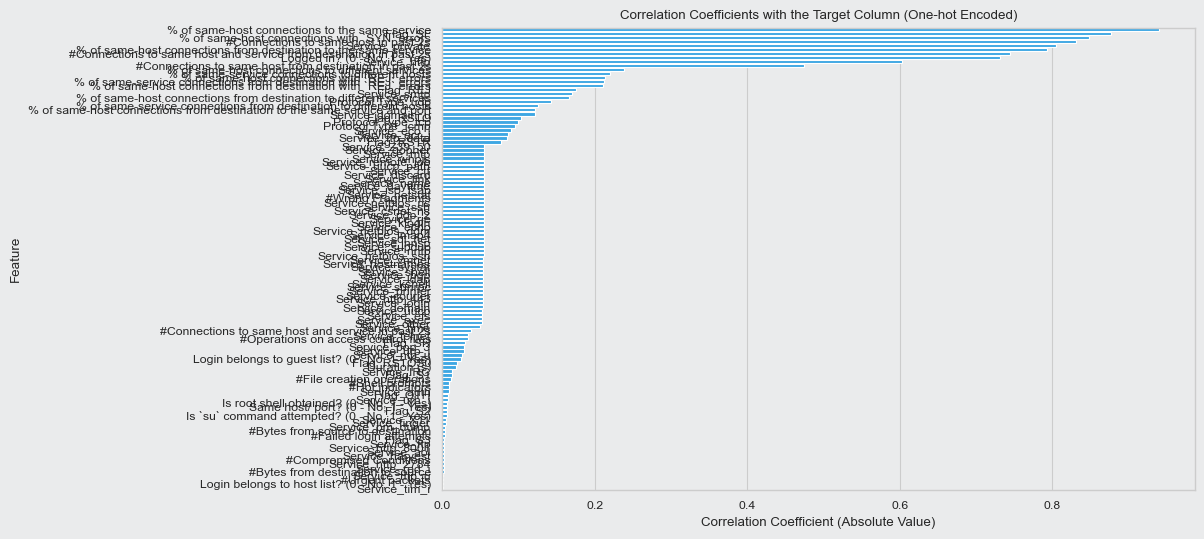

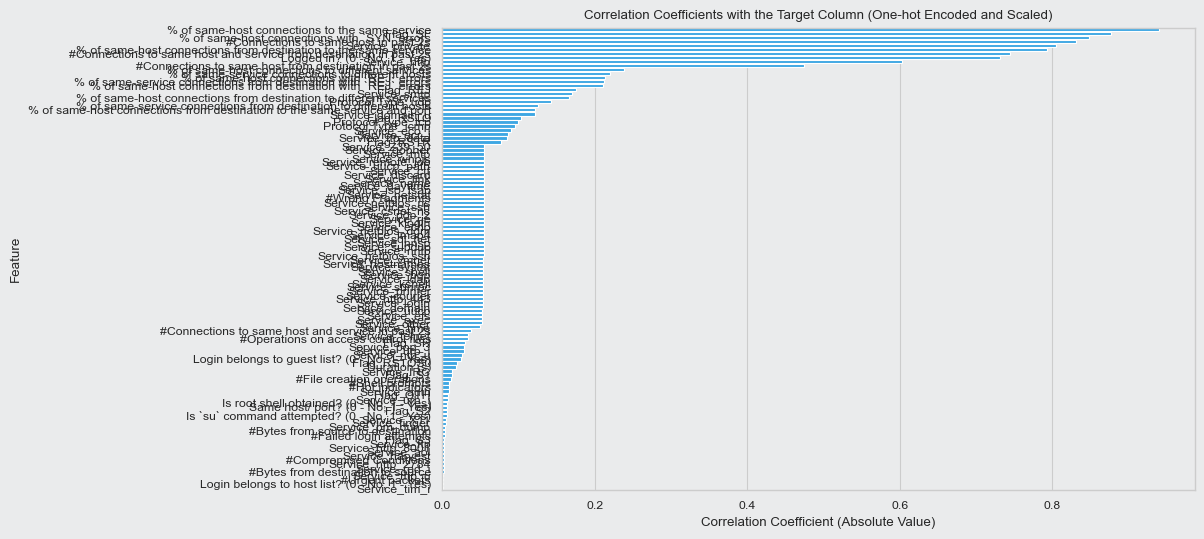

In [70]:
threshold = 0.975

# Also remove columns with just one unique value; there's no information for the target column to be gained from it
def irrelevant_columns(data):
    nunique = data.nunique()
    return nunique[nunique==1].index.tolist()

drop_label          = set(highly_correlated_columns(training_data_attack_identification_label, threshold)).union(irrelevant_columns(training_data_attack_identification_label))
drop_label_scaled   = set(highly_correlated_columns(training_data_attack_identification_label_scaled, threshold)).union(irrelevant_columns(training_data_attack_identification_label_scaled))
drop_1hot           = set(highly_correlated_columns(training_data_attack_identification_1hot, threshold)).union(irrelevant_columns(training_data_attack_identification_1hot))
drop_1hot_scaled    = set(highly_correlated_columns(training_data_attack_identification_1hot_scaled, threshold)).union(irrelevant_columns(training_data_attack_identification_1hot_scaled))

correlations = {
    util.File.correlations_attack_identification_label:
    np.abs(training_data_attack_identification_label.drop(drop_label, axis=1).corrwith(training_data_attack_identification_label[Col.target_identification])).sort_values(ascending=False)[1:],

    util.File.correlations_attack_identification_label_scaled:
    np.abs(training_data_attack_identification_label_scaled.drop(drop_label_scaled, axis=1).corrwith(training_data_attack_identification_label_scaled[Col.target_identification])).sort_values(ascending=False)[1:],

    util.File.correlations_attack_identification_1hot:
    np.abs(training_data_attack_identification_1hot.drop(drop_1hot, axis=1).corrwith(training_data_attack_identification_1hot[Col.target_identification])).sort_values(ascending=False)[1:],

    util.File.correlations_attack_identification_1hot_scaled:
    np.abs(training_data_attack_identification_1hot_scaled.drop(drop_1hot_scaled, axis=1).corrwith(training_data_attack_identification_1hot_scaled[Col.target_identification])).sort_values(ascending=False)[1:],
}

# Save values for later
for file, series in correlations.items():
    if not path.exists(file):
        _series = series.reset_index()
        _series.columns = ['Feature', 'Coefficient']
        _series.to_csv(file, index=False)

# Visualize
cases = ['Label Encoded', 'Label Encoded and Scaled', 'One-hot Encoded', 'One-hot Encoded and Scaled']
for idx, series in enumerate(correlations.values()):
    sns.barplot(data=series, orient='h')
    plt.xlabel('Correlation Coefficient (Absolute Value)')
    plt.ylabel('Feature')
    plt.title(f'Correlation Coefficients with the Target Column ({cases[idx]})')
    plt.show()

The observant eye will notice that while the actual correlation coefficients might differ between the differently treated datasets, their ranking ends up the same:

In [55]:
correlations[util.File.correlations_attack_identification_label].index.tolist() == correlations[util.File.correlations_attack_identification_label_scaled].index.tolist()

True

In [56]:
correlations[util.File.correlations_attack_identification_1hot].index.tolist() == correlations[util.File.correlations_attack_identification_1hot_scaled].index.tolist()

True

When we will use those rankings later, there will be a convenient `Col.top(n, ...)` function available to extract the desired number of features from those files or, alternatively, one can use `Col.above(threshold, ...)` to use all features with a correlation coefficient greater than the given threshold.

### Preprocessing for Attack Classification

The process is pretty much similar to the previous case, except that our target column changed as well as the fact that we now have records that we actively not want our models to see.
The idea is that after an attack has been identified by the first model, the second jumps in to classify it further.
For that purpose, it doesn't need to know what a genuine record would look like - it needs to learn only on attacks.
This goes, of course, for both the training and the verification data.

In [57]:
training_data_attack_classification_naive = training_data_[training_data_[Col.target_identification]].drop([Col.target_type, Col.target_identification, 'Source', '#Outbound commands in ftp session'], axis=1)
verification_data_attack_classification_naive = verification_data_[verification_data_[Col.target_identification]].drop([Col.target_type, Col.target_identification, 'Source', '#Outbound commands in ftp session'], axis=1)

Before we move on, let's check if we unintentionally removed the significance of any of the columns altogether.
After all, it could be that we now find, for instance, binary columns with only one value in our remaining datasets.

In [58]:
training_data_attack_classification_naive.nunique()[training_data_attack_classification_naive.nunique()==1]

Login belongs to host list? (0 - No, 1 - Yes)    1
dtype: int64

In [59]:
verification_data_attack_classification_naive.nunique()[verification_data_attack_classification_naive.nunique()==1]

Series([], dtype: int64)

Indeed, in our training data the `Login belongs to host list? (0 - No, 1 - Yes)` has become obsolete.
But what's interesting is that that's not the case for the attacks in the verification data.

However, given that our models won't gain anything from this feature in the training period, we will remove it from our feature list anyway.

Out of curiosity, let's see how many records in the verification dataset do jump out of line here:

In [60]:
verification_data_attack_classification_naive['Login belongs to host list? (0 - No, 1 - Yes)'].value_counts()

Login belongs to host list? (0 - No, 1 - Yes)
0    29367
1       11
Name: count, dtype: int64

Seeing that only $11$ attacks out of the available $29,378$ use this specific feature further justifies our decision.
It comes to little surprise, though, that those $11$ cases fall into the two drastically under-represented minority classes:

In [61]:
verification_data_attack_classification_naive[verification_data_attack_classification_naive['Login belongs to host list? (0 - No, 1 - Yes)']==1][Col.target_classification].value_counts()

Target group
r2l    9
u2r    2
Name: count, dtype: int64

Still, we will stick with our decision.

In [62]:
training_data_attack_classification = training_data_attack_classification_naive.drop('Login belongs to host list? (0 - No, 1 - Yes)', axis=1)
verification_data_attack_classification = verification_data_attack_classification_naive.drop('Login belongs to host list? (0 - No, 1 - Yes)', axis=1)

From here, we proceed exactly as we did before, starting with label encoding.
By the way, this time the target column itself also needs to be encoded.

In [63]:
# -- Label Encoding --

categorical_columns = training_data_attack_classification.select_dtypes('object').columns

# The encoder must be fit on a dataset that contains all relevant features
combined_data_attack_classification = combined_data_[combined_data_[Col.target_identification]].drop([Col.target_identification, Col.target_type, '#Outbound commands in ftp session'], axis=1)

# Create copies of the data frames to encode
training_data_attack_classification_label = training_data_attack_classification.copy()
verification_data_attack_classification_label = verification_data_attack_classification.copy()

# Encode each of the categorical columns
for column in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(combined_data_attack_classification[column])
    training_data_attack_classification_label[column]       = encoder.transform(training_data_attack_classification[column])
    verification_data_attack_classification_label[column]   = encoder.transform(verification_data_attack_classification[column])

# Check the result
training_data_attack_classification_label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262178 entries, 7448 to 4867871
Data columns (total 40 columns):
 #   Column                                                                    Non-Null Count   Dtype  
---  ------                                                                    --------------   -----  
 0   Duration (s)                                                              262178 non-null  int64  
 1   Protocol Type                                                             262178 non-null  int64  
 2   Service                                                                   262178 non-null  int64  
 3   Flag                                                                      262178 non-null  int64  
 4   #Bytes from source to destination                                         262178 non-null  int64  
 5   #Bytes from destination to source                                         262178 non-null  int64  
 6   Same host/ port? (0 - No, 1 - Yes)                   

In [64]:
# -- One-hot encoding --
combined_data_attack_classification_1hot = pd.get_dummies(combined_data_attack_classification)
training_data_attack_classification_1hot = combined_data_attack_classification_1hot[combined_data_attack_classification_1hot.Source_Training].drop(['Source_Training', 'Source_Verification'], axis=1)
verification_data_attack_classification_1hot = combined_data_attack_classification_1hot[combined_data_attack_classification_1hot.Source_Verification].drop(['Source_Training', 'Source_Verification'], axis=1)

# Check the result
training_data_attack_classification_1hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262178 entries, 7448 to 4867871
Columns: 121 entries, Duration (s) to Target group_u2r
dtypes: bool(84), float64(15), int64(22)
memory usage: 97.0 MB


In [65]:
# -- Scaling Numeric Columns --

scaler = StandardScaler()

# To emulate realistic behaviour, let's assume we have only our training data to fit the scaler on
numeric_columns = list(filter(lambda feature: feature != '#Outbound commands in ftp session', percent_features + counter_features))
scaler.fit(training_data_attack_classification[numeric_columns])

# Create copies of the data to perform the scaling on
training_data_attack_classification_scaled        = training_data_attack_classification.copy()
training_data_attack_classification_1hot_scaled   = training_data_attack_classification_1hot.copy()
training_data_attack_classification_label_scaled  = training_data_attack_classification_label.copy()
verification_data_attack_classification_scaled         = verification_data_attack_classification.copy()
verification_data_attack_classification_1hot_scaled    = verification_data_attack_classification_1hot.copy()
verification_data_attack_classification_label_scaled   = verification_data_attack_classification_label.copy()

# Transform all numeric columns using the prepared scaler
training_data_attack_classification_scaled[numeric_columns]       = scaler.transform(training_data_attack_classification[numeric_columns])
training_data_attack_classification_1hot_scaled[numeric_columns]  = training_data_attack_classification_scaled[numeric_columns]
training_data_attack_classification_label_scaled[numeric_columns] = training_data_attack_classification_scaled[numeric_columns]
verification_data_attack_classification_scaled[numeric_columns]        = scaler.transform(verification_data_attack_classification[numeric_columns])
verification_data_attack_classification_1hot_scaled[numeric_columns]   = verification_data_attack_classification_scaled[numeric_columns]
verification_data_attack_classification_label_scaled[numeric_columns]  = verification_data_attack_classification_scaled[numeric_columns]

In [66]:
# Store all those data frames in files
if not path.exists(util.File.training_attack_classification):
    training_data_attack_classification.to_csv(util.File.training_attack_classification, index=False)
if not path.exists(util.File.verification_attack_classification):
    verification_data_attack_classification.to_csv(util.File.verification_attack_classification, index=False)
if not path.exists(util.File.training_attack_classification_label):
    training_data_attack_classification_label.to_csv(util.File.training_attack_classification_label, index=False)
if not path.exists(util.File.verification_attack_classification_label):
    verification_data_attack_classification_label.to_csv(util.File.verification_attack_classification_label, index=False)
if not path.exists(util.File.training_attack_classification_1hot):
    training_data_attack_classification_1hot.to_csv(util.File.training_attack_classification_1hot, index=False)
if not path.exists(util.File.verification_attack_classification_1hot):
    verification_data_attack_classification_1hot.to_csv(util.File.verification_attack_classification_1hot, index=False)
if not path.exists(util.File.training_attack_classification_scaled):
    training_data_attack_classification_scaled.to_csv(util.File.training_attack_classification_scaled, index=False)
if not path.exists(util.File.verification_attack_classification_scaled):
    verification_data_attack_classification_scaled.to_csv(util.File.verification_attack_classification_scaled, index=False)
if not path.exists(util.File.training_attack_classification_label_scaled):
    training_data_attack_classification_label_scaled.to_csv(util.File.training_attack_classification_label_scaled, index=False)
if not path.exists(util.File.verification_attack_classification_label_scaled):
    verification_data_attack_classification_label_scaled.to_csv(util.File.verification_attack_classification_label_scaled, index=False)
if not path.exists(util.File.training_attack_classification_1hot_scaled):
    training_data_attack_classification_1hot_scaled.to_csv(util.File.training_attack_classification_1hot_scaled, index=False)
if not path.exists(util.File.verification_attack_classification_1hot_scaled):
    verification_data_attack_classification_1hot_scaled.to_csv(util.File.verification_attack_classification_1hot_scaled, index=False)

And finally, we look into the correlation coefficients again.
Except that this time we skip the scaled versions altogether (for visualization) and we need to change the code for the target column for the one-hot encoded case a little bit.

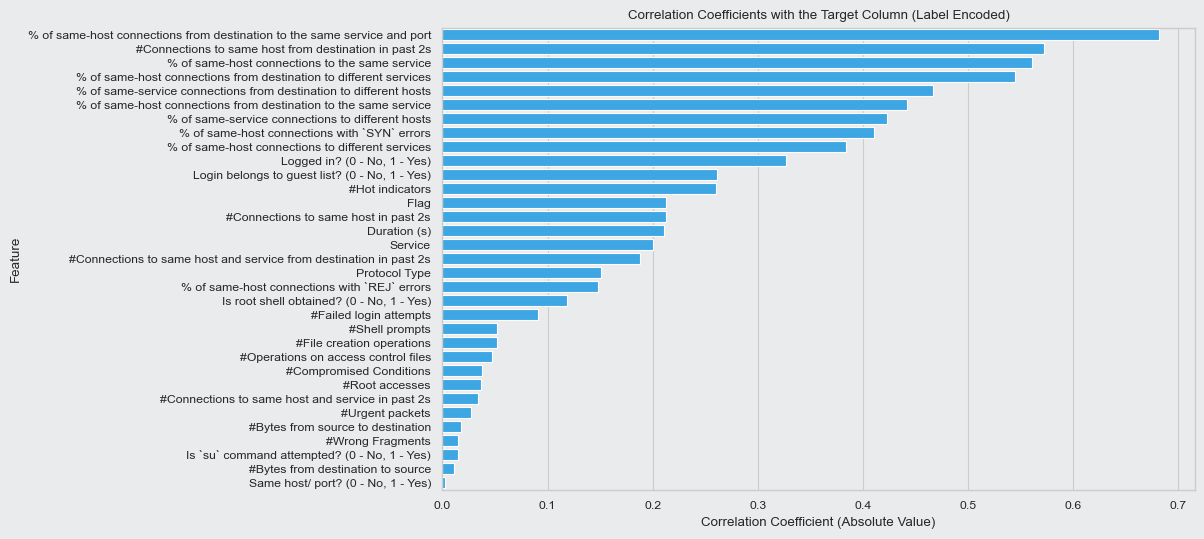

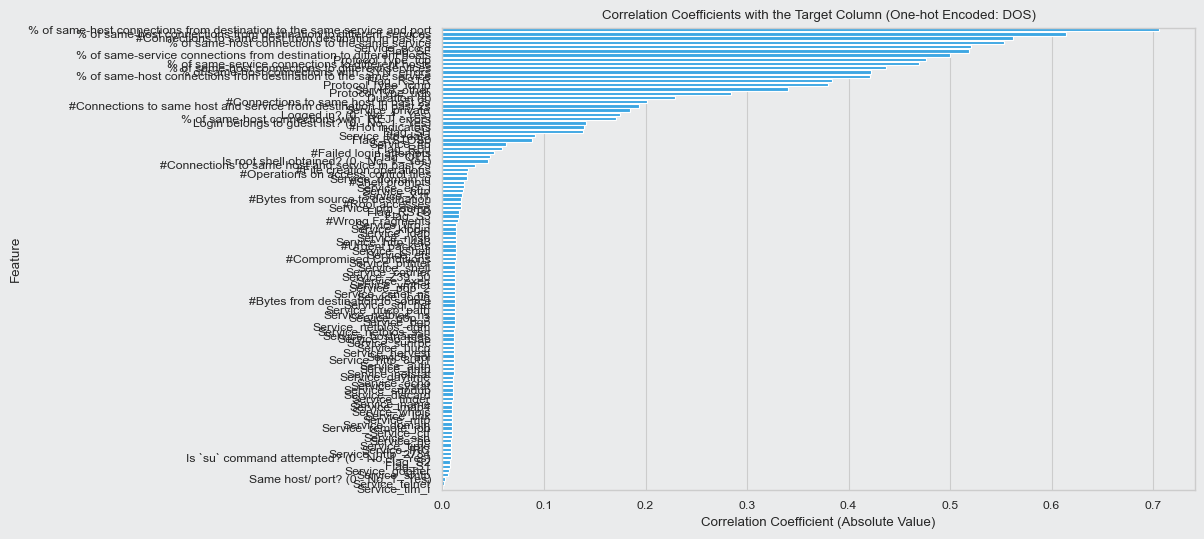

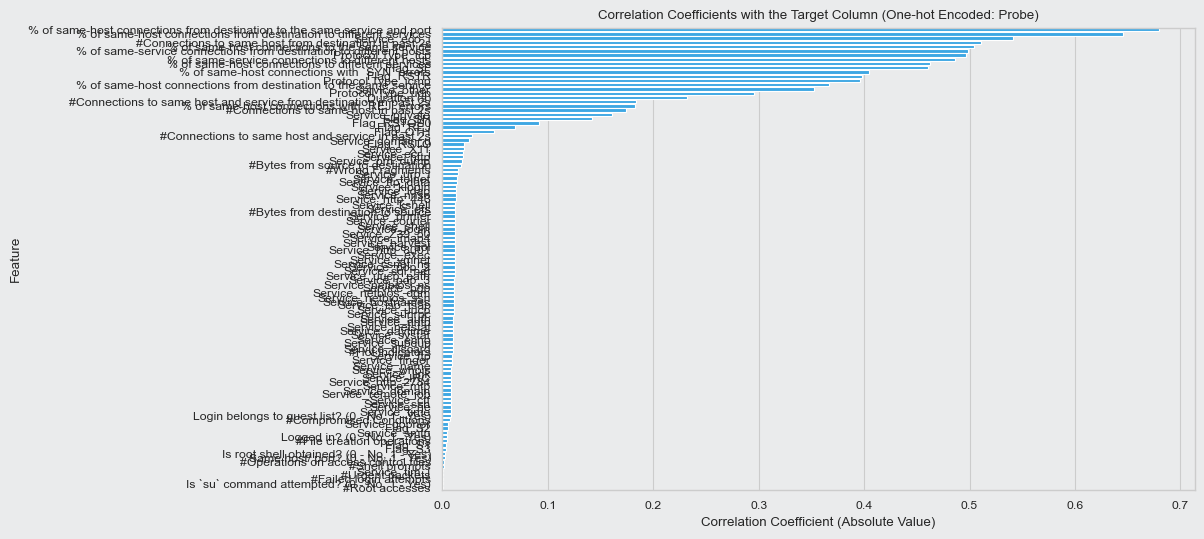

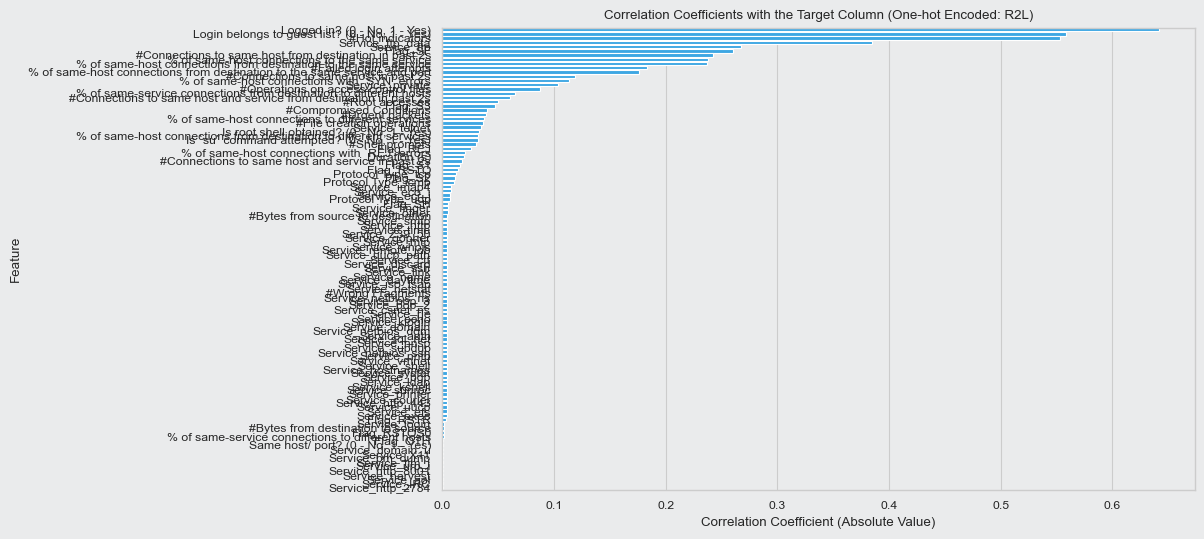

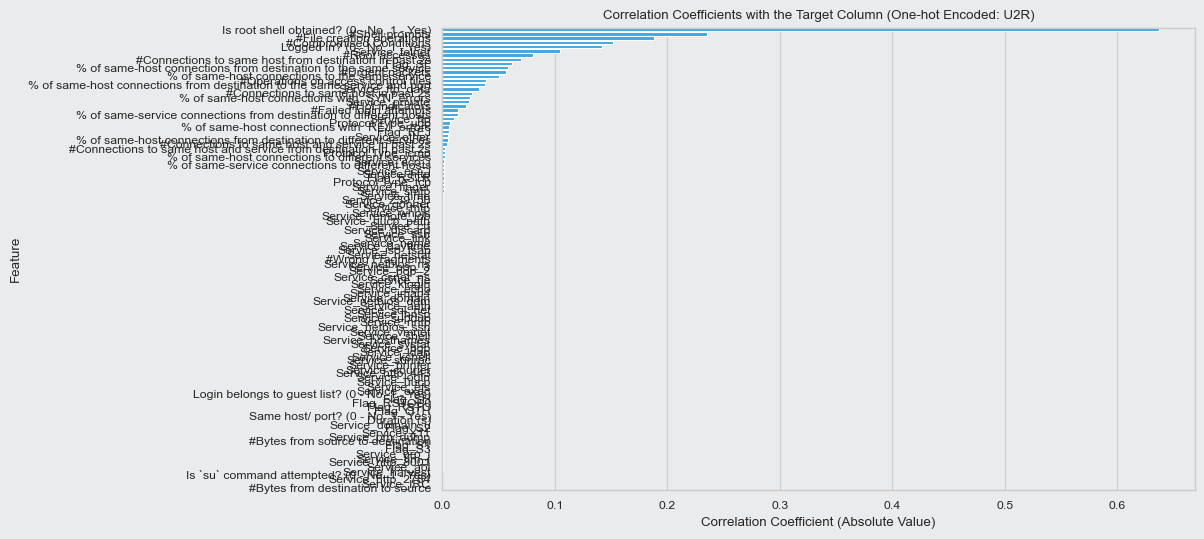

In [72]:
drop_label          = set(highly_correlated_columns(training_data_attack_classification_label, threshold)).union(irrelevant_columns(training_data_attack_classification_label))
drop_label_scaled   = set(highly_correlated_columns(training_data_attack_classification_label_scaled, threshold)).union(irrelevant_columns(training_data_attack_classification_label_scaled))
drop_1hot           = set(highly_correlated_columns(training_data_attack_classification_1hot, threshold)).union(irrelevant_columns(training_data_attack_classification_1hot))
drop_1hot_scaled    = set(highly_correlated_columns(training_data_attack_classification_1hot_scaled, threshold)).union(irrelevant_columns(training_data_attack_classification_1hot_scaled))

def all_but(column): return list(filter(lambda col: col != column, [Col.target_dos, Col.target_probe, Col.target_r2l, Col.target_u2r]))

correlations = {
    util.File.correlations_attack_classification_label:
    np.abs(training_data_attack_classification_label.drop(drop_label, axis=1).corrwith(training_data_attack_classification_label[Col.target_classification])).sort_values(ascending=False)[1:],

    util.File.correlations_attack_classification_label_scaled:
    np.abs(training_data_attack_classification_label_scaled.drop(drop_label_scaled, axis=1).corrwith(training_data_attack_classification_label_scaled[Col.target_classification])).sort_values(ascending=False)[1:],

    util.File.correlations_attack_classification_1hot_dos:
    np.abs(training_data_attack_classification_1hot.drop(drop_1hot.union(all_but(Col.target_dos)), axis=1).corrwith(training_data_attack_classification_1hot[Col.target_dos])).sort_values(ascending=False)[1:],

    util.File.correlations_attack_classification_1hot_dos_scaled:
    np.abs(training_data_attack_classification_1hot_scaled.drop(drop_1hot_scaled.union(all_but(Col.target_dos)), axis=1).corrwith(training_data_attack_classification_1hot_scaled[Col.target_dos])).sort_values(ascending=False)[1:],

    util.File.correlations_attack_classification_1hot_probe:
    np.abs(training_data_attack_classification_1hot.drop(drop_1hot.union(all_but(Col.target_probe)), axis=1).corrwith(training_data_attack_classification_1hot[Col.target_probe])).sort_values(ascending=False)[1:],

    util.File.correlations_attack_classification_1hot_probe_scaled:
    np.abs(training_data_attack_classification_1hot_scaled.drop(drop_1hot_scaled.union(all_but(Col.target_probe)), axis=1).corrwith(training_data_attack_classification_1hot_scaled[Col.target_probe])).sort_values(ascending=False)[1:],

    util.File.correlations_attack_classification_1hot_r2l:
    np.abs(training_data_attack_classification_1hot.drop(drop_1hot.union(all_but(Col.target_r2l)), axis=1).corrwith(training_data_attack_classification_1hot[Col.target_r2l])).sort_values(ascending=False)[1:],

    util.File.correlations_attack_classification_1hot_r2l_scaled:
    np.abs(training_data_attack_classification_1hot_scaled.drop(drop_1hot_scaled.union(all_but(Col.target_r2l)), axis=1).corrwith(training_data_attack_classification_1hot_scaled[Col.target_r2l])).sort_values(ascending=False)[1:],

    util.File.correlations_attack_classification_1hot_u2r:
    np.abs(training_data_attack_classification_1hot.drop(drop_1hot.union(all_but(Col.target_u2r)), axis=1).corrwith(training_data_attack_classification_1hot[Col.target_u2r])).sort_values(ascending=False)[1:],

    util.File.correlations_attack_classification_1hot_u2r_scaled:
    np.abs(training_data_attack_classification_1hot_scaled.drop(drop_1hot_scaled.union(all_but(Col.target_u2r)), axis=1).corrwith(training_data_attack_classification_1hot_scaled[Col.target_u2r])).sort_values(ascending=False)[1:],
}

# Save values for later
for file, series in correlations.items():
    if not path.exists(file):
        _series = series.reset_index()
        _series.columns = ['Feature', 'Coefficient']
        _series.to_csv(file, index=False)

# Visualize
cases = {
    'Label Encoded':            correlations[util.File.correlations_attack_classification_label],
    'One-hot Encoded: DOS':     correlations[util.File.correlations_attack_classification_1hot_dos],
    'One-hot Encoded: Probe':   correlations[util.File.correlations_attack_classification_1hot_probe],
    'One-hot Encoded: R2L':     correlations[util.File.correlations_attack_classification_1hot_r2l],
    'One-hot Encoded: U2R':     correlations[util.File.correlations_attack_classification_1hot_u2r],
}
for case, series in cases.items():
    sns.barplot(data=series, orient='h')
    plt.xlabel('Correlation Coefficient (Absolute Value)')
    plt.ylabel('Feature')
    plt.title(f'Correlation Coefficients with the Target Column ({case})')
    plt.show()

And with that we are set for the machine learning part.

--------------------------------------------------------------------------------

To next notebook: [Network Traffic ML Part 1](./network-traffic-ml-part1.ipynb)